# Contents

**Create and save cleaned ames data for analysis**
[ames_clean.pkl](#ames_clean.pkl)

**[Data Types](#Data-Types)**

Datatypes:
- Reclassify OverallQual and OverallCond as ordinal datatypes (per data dictionary)
- Reclassify MSSubClass as categorical (nominal)
- Examine date features: MoSold and YrSold redefined as categorical datatypes
    - MoSold and YrSold redefined as categorical datatypes for modeling options.
    - Left other date features as numeric, to prevent dimensionality problems when ordinal encoding.
    - Redefine GarageYrBlt from 'float' to 'int' to match other date features (after imputation).


**[Missing Data](#Missing-Data)**
- EDA


**[Data Imputation](#Data-Imputation)**

Explore data relationships to determine best imputation strategy:
- [Numerical Feature Imputation](#Numerical-Feature-Imputation)
    - After exploring relationship between GarageYrBlt and YearBuilt, impute missing values with YearBuilt
    - After evaluating relationship between LotArea and LotFrontage, impute LotFrontage with median
    - Impute remaining numerical features with median values
- [Categorical Feature Imputation](#Categorical-Feature-Imputation)
    - Impute missing Electrical value with mode value
    - After evaluating Garage features, impute missing values with 'None'
    - Impute remaining categorical features with 'None'
    
- Reclassify GarageYrBlt data type as 'int' after data imputation with YearBuilt


**[Outlier Analysis](#Outlier-Analysis)**

- Did not remove any data
- Looked at GrLivArea v SalePrice for ames with and without the 2 extreme GrLivArea values. Did not see any significant impact on the two models, choosing to keep them. 
- *Note: This is contrary to De Cock's recommendation*

**[Extra](#Extra)**
- Multicollinearity - heatmap

**[Resources](#Resources)**

## Import data and libraries

In [3]:
# libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [4]:
ames_raw = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0).reset_index()

In [5]:
ames_raw.drop(columns=['index'], inplace=True)

In [6]:
ames_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [7]:
ames = ames_raw.copy()
ames = ames.drop(columns='PID', axis=1)
ames.shape

(2580, 80)

In [8]:
ames.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [9]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

# Data Types

- GarageYrBuilt and YearBuilt should be the same dataypes. Change GarageYrBlt after imputation
- Change MSSubClass from integer type to categorical type for nominal encoding.
- Reclassify OverallQual and OverallCond from integer types to categorical types for ordinal encoding.
- Deviating from De Cock data type classifications, change YrSold and MoSold from integer types to object types.
  
[Return To Top](#Contents)

In [11]:
ames_raw.dtypes.value_counts()

object     43
int64      27
float64    11
Name: count, dtype: int64

In [12]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2118 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          168 non-null    object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle     2580 non-null   object 
 18  OverallQ

### Feature types defined in De Cock's data dictionary

### Numerical features

In [15]:
ames.select_dtypes(include=['float64', 'int64'])

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,856,126000,30,NaN,7890,6,6,1939,1950,0.0,...,399.0,0,0,0,0,166,0,0,3,2010
1,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,...,266.0,0,105,0,0,0,0,0,2,2009
2,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,...,216.0,154,0,42,86,0,0,0,11,2007
3,1039,114000,70,80.0,8146,4,8,1900,2003,0.0,...,281.0,0,0,168,0,111,0,0,5,2009
4,1665,227000,60,70.0,8400,8,6,2001,2001,0.0,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,30,NaN,8854,6,6,1916,1950,0.0,...,192.0,0,98,0,0,40,0,0,5,2009
2576,1733,139600,20,NaN,13680,3,5,1955,1955,0.0,...,452.0,0,0,0,0,0,0,0,6,2009
2577,2002,145000,90,82.0,6270,5,6,1949,1950,0.0,...,871.0,0,0,0,0,0,0,0,8,2007
2578,1842,217500,60,NaN,8826,7,5,2000,2000,144.0,...,486.0,193,96,0,0,0,0,0,7,2007


In [16]:
numeric_features = ames.select_dtypes(include=['float64', 'int64'])

In [17]:
# reclassify MSSubClass
ames['MSSubClass'] = ames['MSSubClass'].astype('object')

In [18]:
ames.select_dtypes(include=['float64', 'int64'])

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,856,126000,NaN,7890,6,6,1939,1950,0.0,238.0,...,399.0,0,0,0,0,166,0,0,3,2010
1,1049,139500,42.0,4235,5,5,1984,1984,149.0,552.0,...,266.0,0,105,0,0,0,0,0,2,2009
2,1001,124900,60.0,6060,5,9,1930,2007,0.0,737.0,...,216.0,154,0,42,86,0,0,0,11,2007
3,1039,114000,80.0,8146,4,8,1900,2003,0.0,0.0,...,281.0,0,0,168,0,111,0,0,5,2009
4,1665,227000,70.0,8400,8,6,2001,2001,0.0,643.0,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,NaN,8854,6,6,1916,1950,0.0,0.0,...,192.0,0,98,0,0,40,0,0,5,2009
2576,1733,139600,NaN,13680,3,5,1955,1955,0.0,0.0,...,452.0,0,0,0,0,0,0,0,6,2009
2577,2002,145000,82.0,6270,5,6,1949,1950,0.0,284.0,...,871.0,0,0,0,0,0,0,0,8,2007
2578,1842,217500,NaN,8826,7,5,2000,2000,144.0,841.0,...,486.0,193,96,0,0,0,0,0,7,2007


In [19]:
# reclassify OverallCond and OverallQual as object types for ordinal encoding
ames['OverallQual'] = ames['OverallQual'].astype('object')
ames['OverallCond'] = ames['OverallCond'].astype('object')

In [20]:
ames.select_dtypes(include=['float64', 'int64'])

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,856,126000,NaN,7890,1939,1950,0.0,238.0,0.0,618.0,...,399.0,0,0,0,0,166,0,0,3,2010
1,1049,139500,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,...,266.0,0,105,0,0,0,0,0,2,2009
2,1001,124900,60.0,6060,1930,2007,0.0,737.0,0.0,100.0,...,216.0,154,0,42,86,0,0,0,11,2007
3,1039,114000,80.0,8146,1900,2003,0.0,0.0,0.0,405.0,...,281.0,0,0,168,0,111,0,0,5,2009
4,1665,227000,70.0,8400,2001,2001,0.0,643.0,0.0,167.0,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,NaN,8854,1916,1950,0.0,0.0,0.0,952.0,...,192.0,0,98,0,0,40,0,0,5,2009
2576,1733,139600,NaN,13680,1955,1955,0.0,0.0,0.0,0.0,...,452.0,0,0,0,0,0,0,0,6,2009
2577,2002,145000,82.0,6270,1949,1950,0.0,284.0,0.0,717.0,...,871.0,0,0,0,0,0,0,0,8,2007
2578,1842,217500,NaN,8826,2000,2000,144.0,841.0,0.0,144.0,...,486.0,193,96,0,0,0,0,0,7,2007


In [21]:
ames.select_dtypes(include=['float64', 'int64']).columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

**Note:** These are the correct, 34 numerical features

In [23]:
len(ames.select_dtypes(include=['object']).columns)

46

## Date features

In [25]:
ames_raw[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     2580 non-null   int64  
 1   YearRemodAdd  2580 non-null   int64  
 2   GarageYrBlt   2451 non-null   float64
 3   MoSold        2580 non-null   int64  
 4   YrSold        2580 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 100.9 KB


In [26]:
ames[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,1939,1950,1939.0,3,2010
1,1984,1984,1984.0,2,2009


In [27]:
ames['GarageYrBlt'].isnull().sum()

129

**Note:** Reclassify GarageYrBlt datatype after data imputation

In [29]:
# ames['GarageYrBlt'] = ames['GarageYrBlt'].astype('int64')

In [30]:
print(ames['YearBuilt'].nunique())
print(ames['YearRemodAdd'].nunique())
print(ames['GarageYrBlt'].nunique())
print(ames['MoSold'].nunique())
print(ames['YrSold'].nunique())

114
61
100
12
5


The year features are categorical in nature, but it is not worth reclassifying all of them, because they have too many categories, creating too much complexity after they are encoded. MoSold and YrSold can be reclassified, with only 12 and 5 categories, leaving GarageYrBlt, YearRemodAdd, and YearBuilt as numeric.

Changing them here for future modeling purposes. This will change the number of numeric features to 32, adding 2 features to the categorical features. These are the only datatypes that I alter from the orginal data dictionary categorizations.

In [32]:
len(ames.select_dtypes(include=['float64', 'int64']).columns)

34

In [33]:
ames.select_dtypes(include=['float64', 'int64']).columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [34]:
ames.dtypes.value_counts()

object     46
int64      23
float64    11
Name: count, dtype: int64

In [35]:
# reclassify date features for modeling that are categorical in nature and that will not create too much complexity when encoded
ames['YrSold'] = ames['YrSold'].astype('object')
ames['MoSold'] = ames['MoSold'].astype('object')

print(ames.dtypes.value_counts())

object     48
int64      21
float64    11
Name: count, dtype: int64


### Data Type Summary 
After changing MoSold and YrSold data types from integer to categorical features and dropping PID from dataframe:

# Missing Data
all features

[Return To Top](#Contents)

(See Vinod's post: https://machinelearningmastery.com/revealing_the_invisible/)

In [38]:
# visulazing missing data
missing_data = ames.isnull().sum()
missing_data

GrLivArea          0
SalePrice          0
MSSubClass         0
MSZoning           0
LotFrontage      462
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [39]:
missing_data[missing_data != 0]

LotFrontage      462
Alley           2412
MasVnrType      1573
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [40]:
# calculate percentage of data missing for each feature
# len(ames) = number of rows
missing_percentage = (missing_data / len(ames)) * 100
missing_percentage.head()

GrLivArea       0.000000
SalePrice       0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.906977
dtype: float64

In [41]:
missing_percentage[missing_percentage != 0]

LotFrontage     17.906977
Alley           93.488372
MasVnrType      60.968992
MasVnrArea       0.542636
BsmtQual         2.674419
BsmtCond         2.674419
BsmtExposure     2.751938
BsmtFinType1     2.674419
BsmtFinSF1       0.038760
BsmtFinType2     2.713178
BsmtFinSF2       0.038760
BsmtUnfSF        0.038760
TotalBsmtSF      0.038760
Electrical       0.038760
BsmtFullBath     0.077519
BsmtHalfBath     0.077519
FireplaceQu     48.100775
GarageType       4.922481
GarageYrBlt      5.000000
GarageFinish     5.000000
GarageCars       0.038760
GarageArea       0.038760
GarageQual       5.000000
GarageCond       5.000000
PoolQC          99.651163
Fence           79.651163
MiscFeature     96.240310
dtype: float64

In [42]:
# collect data types for each feature
data_type = ames.dtypes
data_type

GrLivArea          int64
SalePrice          int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
                  ...   
MiscVal            int64
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [43]:
# turn into a df
data = {'Missing Values': missing_data,
        'Percentage': missing_percentage,
        'Data Type': data_type}
missing_info = pd.DataFrame(data)
missing_info[missing_info['Missing Values'] != 0]

,Missing Values,Percentage,Data Type
LotFrontage,462,17.906977,float64
Alley,2412,93.488372,object
MasVnrType,1573,60.968992,object
MasVnrArea,14,0.542636,float64
BsmtQual,69,2.674419,object
BsmtCond,69,2.674419,object
BsmtExposure,71,2.751938,object
BsmtFinType1,69,2.674419,object
BsmtFinSF1,1,0.038760,float64
BsmtFinType2,70,2.713178,object


In [44]:
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
missing_info.head(30)

,Missing Values,Percentage,Data Type
PoolQC,2571,99.651163,object
MiscFeature,2483,96.240310,object
Alley,2412,93.488372,object
Fence,2055,79.651163,object
MasVnrType,1573,60.968992,object
FireplaceQu,1241,48.100775,object
LotFrontage,462,17.906977,float64
GarageQual,129,5.000000,object
GarageFinish,129,5.000000,object
GarageYrBlt,129,5.000000,float64


In [45]:
missing_info[(missing_info['Missing Values'] > 0)]

,Missing Values,Percentage,Data Type
PoolQC,2571,99.651163,object
MiscFeature,2483,96.240310,object
Alley,2412,93.488372,object
Fence,2055,79.651163,object
MasVnrType,1573,60.968992,object
FireplaceQu,1241,48.100775,object
LotFrontage,462,17.906977,float64
GarageQual,129,5.000000,object
GarageFinish,129,5.000000,object
GarageYrBlt,129,5.000000,float64


In [46]:
missing_info['Data Type'] == np.number

PoolQC           False
MiscFeature      False
Alley            False
Fence            False
MasVnrType       False
                 ...  
SalePrice        False
HeatingQC        False
CentralAir       False
1stFlrSF         False
SaleCondition    False
Name: Data Type, Length: 80, dtype: bool

In [47]:
np.number

numpy.number

In [48]:
# list only the numerical features with missing data
print(missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == np.number)])

              Missing Values  Percentage Data Type
LotFrontage              462   17.906977   float64
GarageYrBlt              129    5.000000   float64
MasVnrArea                14    0.542636   float64
BsmtFullBath               2    0.077519   float64
BsmtHalfBath               2    0.077519   float64
GarageArea                 1    0.038760   float64
TotalBsmtSF                1    0.038760   float64
BsmtUnfSF                  1    0.038760   float64
BsmtFinSF2                 1    0.038760   float64
BsmtFinSF1                 1    0.038760   float64
GarageCars                 1    0.038760   float64


In [49]:
missing_info[(missing_info['Missing Values'] == 0)]

,Missing Values,Percentage,Data Type
YrSold,0,0.0,object
FullBath,0,0.0,int64
HalfBath,0,0.0,int64
BedroomAbvGr,0,0.0,int64
KitchenAbvGr,0,0.0,int64
KitchenQual,0,0.0,object
SaleType,0,0.0,object
MoSold,0,0.0,object
MiscVal,0,0.0,int64
PoolArea,0,0.0,int64


In [50]:
# list numerical features (Data Type = float64) with no missing data
print(missing_info[(missing_info['Missing Values'] == 0)
      & (missing_info['Data Type'] == np.number)])

Empty DataFrame
Columns: [Missing Values, Percentage, Data Type]
Index: []


In [51]:
#pip install missingno

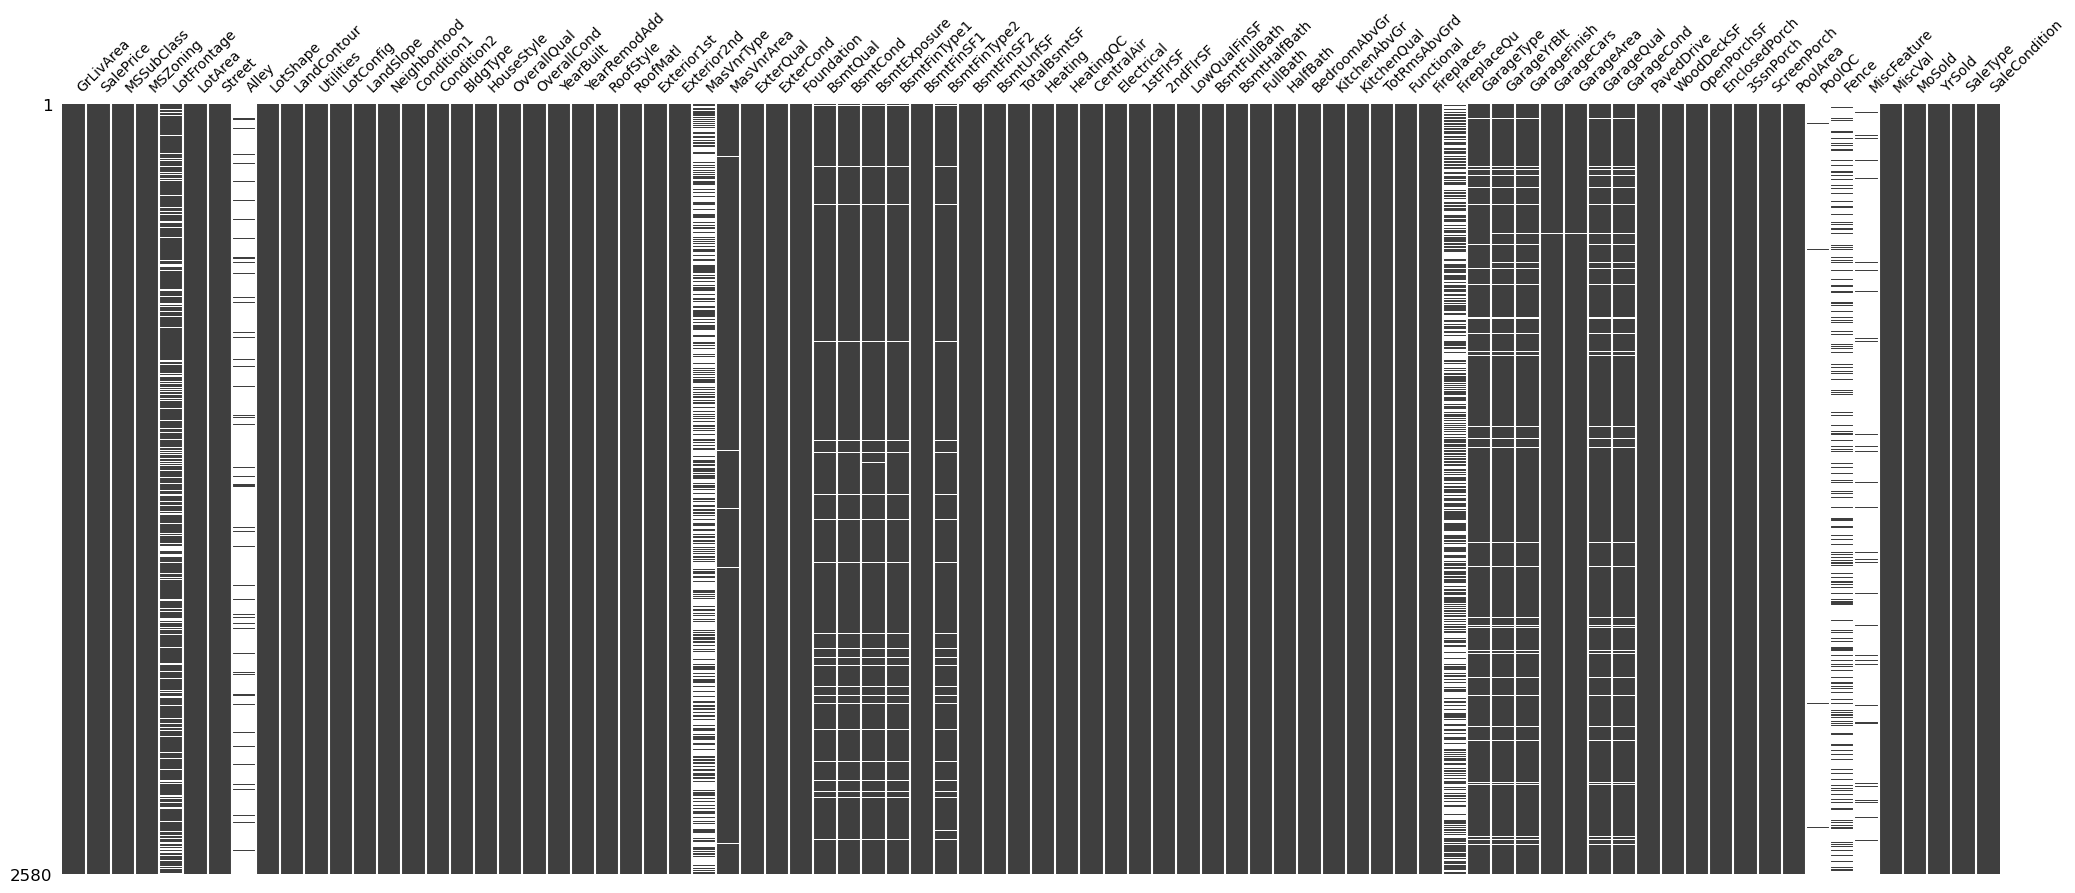

In [52]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(ames, sparkline=False, fontsize=10, labels=True)
plt.show()

In [53]:
# returns a list of features sorted by percentage, generated in missing_info
missing_info.sort_values(by='Percentage', ascending=False).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageQual', 'GarageFinish', 'GarageYrBlt',
       'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond',
       'BsmtQual', 'BsmtFinType1', 'MasVnrArea', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageCars',
       'TotalBsmtSF', 'GarageArea', 'Electrical', 'YearBuilt', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'SalePrice', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'Street', 'LotShape', 'ScreenPorch',
       'LotArea', 'MSZoning', 'YrSold', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'SaleType', 'MoSold', 'MiscVal',
       'PoolArea', 'TotRmsAbv

In [54]:
# Sort the Ames DataFrame columns by the percentage of missing values
sorted_df = ames[missing_info.sort_values(by='Percentage', ascending=False).index]
sorted_df.head()

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageQual,GarageFinish,GarageYrBlt,...,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,GrLivArea,Heating,LowQualFinSF,2ndFlrSF,MSSubClass,SaleCondition
0,NaN,NaN,NaN,NaN,NaN,Gd,NaN,TA,Unf,1939.0,...,0,0,0,Y,856,GasA,0,0,30,Normal
1,NaN,NaN,NaN,NaN,BrkFace,NaN,42.0,TA,Fin,1984.0,...,0,105,0,Y,1049,GasA,0,0,120,Normal
2,NaN,NaN,NaN,NaN,NaN,NaN,60.0,TA,Unf,1930.0,...,42,0,154,N,1001,GasA,0,0,30,Normal
3,NaN,NaN,NaN,NaN,NaN,NaN,80.0,TA,Unf,1940.0,...,168,0,0,N,1039,GasA,0,322,70,Normal
4,NaN,NaN,NaN,NaN,NaN,NaN,70.0,TA,Fin,2001.0,...,0,45,0,Y,1665,GasA,0,855,60,Normal


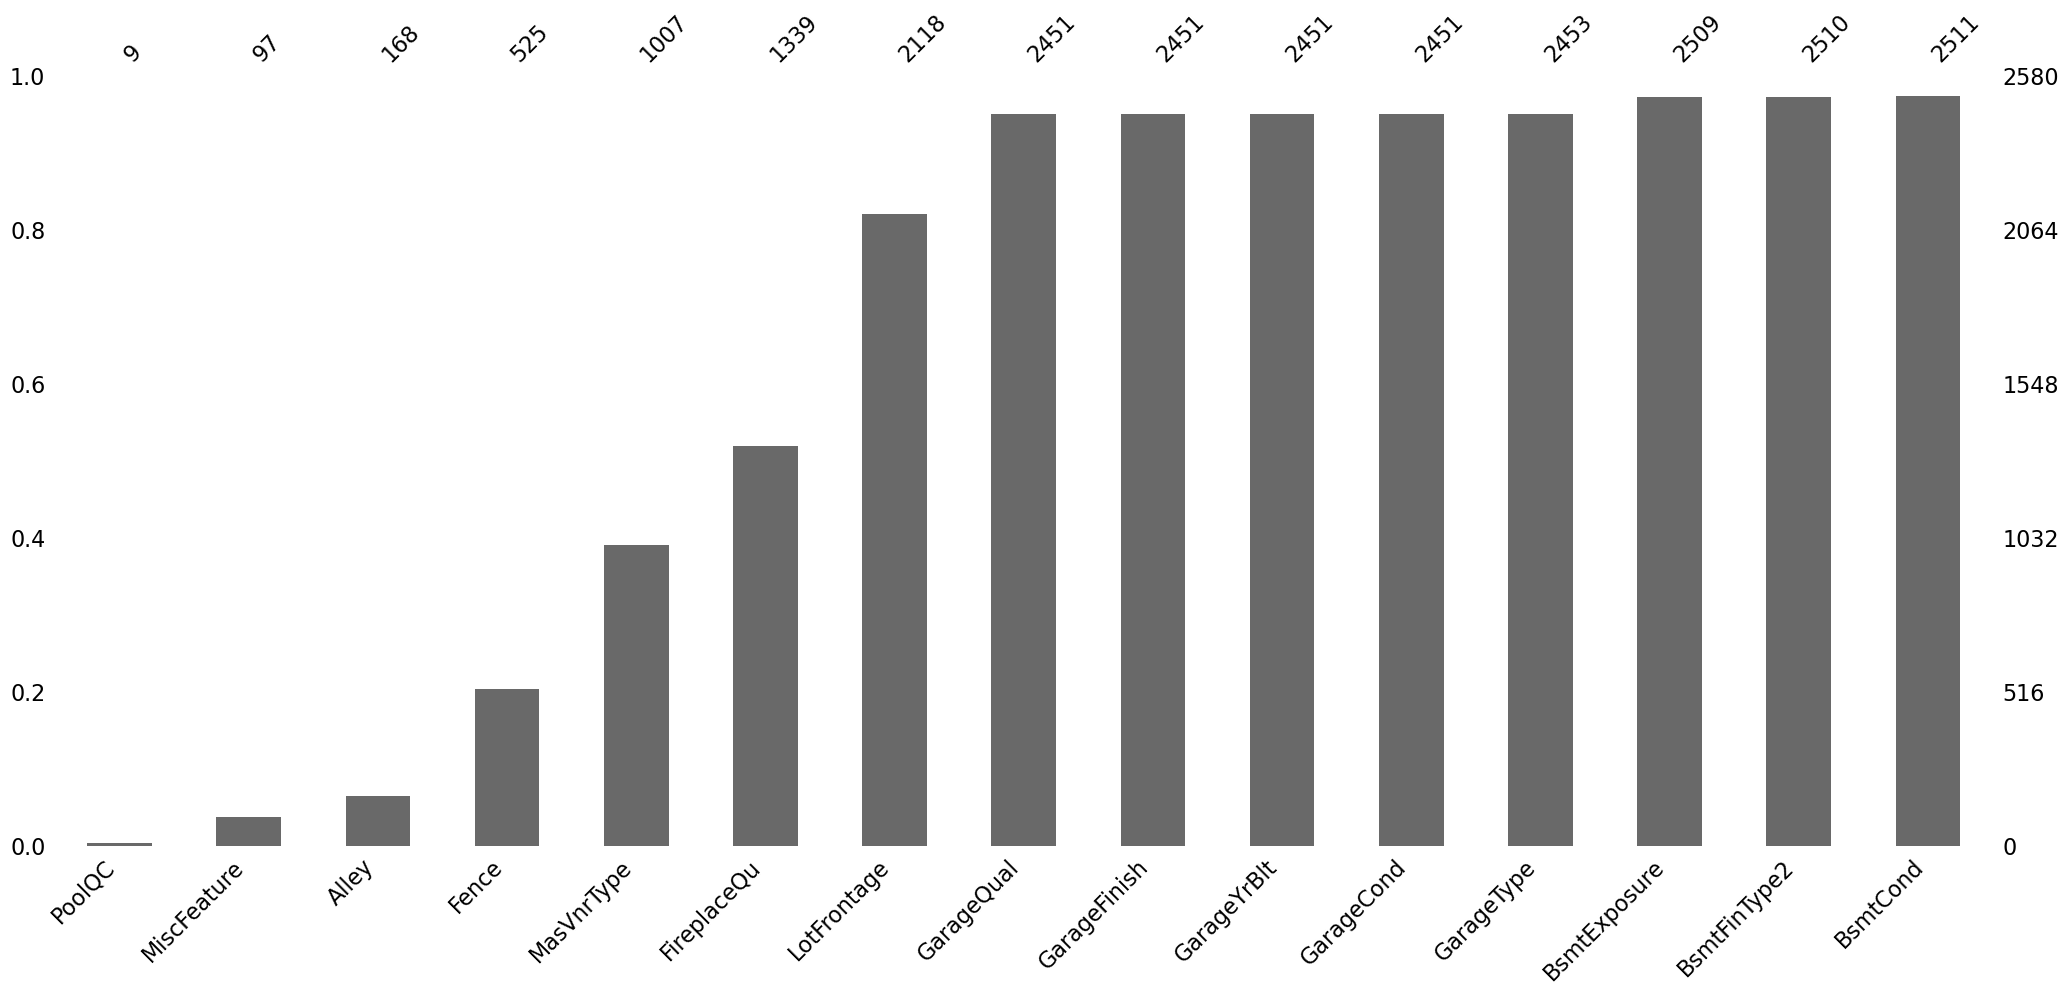

In [55]:
# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [56]:
# create a list of the 15 features with the highest amount of missing data
top_15_missing_info = missing_info.nlargest(15, 'Percentage')
top_15_missing_info.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageQual', 'GarageFinish', 'GarageYrBlt',
       'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond'],
      dtype='object')

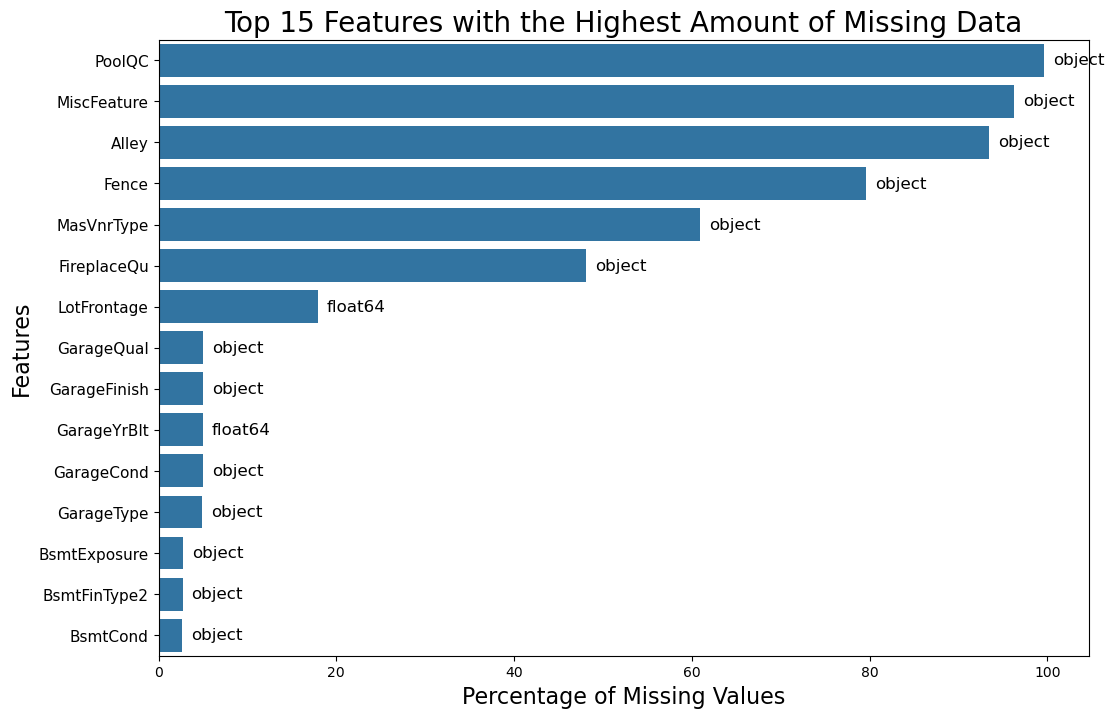

In [57]:
# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage')
 
# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_15_missing_info.index, data=top_15_missing_info, orient='h')

# Add data type annotations
for index, (percentage, feature) in enumerate(zip(top_15_missing_info['Percentage'], top_15_missing_info.index)):
    dtype = top_15_missing_info.loc[feature, 'Data Type']  # Extract dtype
    plt.text(percentage + 1, index, str(dtype), va='center', fontsize=12, color='black')

plt.title('Top 15 Features with the Highest Amount of Missing Data', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show()

# Data Imputation
[Return To Top](#Contents)

In [59]:
# import pandas as pd
# import numpy as np

## Numerical Feature Imputation
Explore numerical features with missing values to determine imputation strategy

[Return To Top](#Contents)

In [61]:
# from above: return a list of features sorted by percentage, generated in missing_info
missing_info.sort_values(by='Percentage', ascending=False).index

#list only the numerical features with missing data
print(missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == np.number)])

              Missing Values  Percentage Data Type
LotFrontage              462   17.906977   float64
GarageYrBlt              129    5.000000   float64
MasVnrArea                14    0.542636   float64
BsmtFullBath               2    0.077519   float64
BsmtHalfBath               2    0.077519   float64
GarageArea                 1    0.038760   float64
TotalBsmtSF                1    0.038760   float64
BsmtUnfSF                  1    0.038760   float64
BsmtFinSF2                 1    0.038760   float64
BsmtFinSF1                 1    0.038760   float64
GarageCars                 1    0.038760   float64


### LotFrontage

In [63]:
lot_data = ames[['LotFrontage', 'LotArea']]
lot_data

,LotFrontage,LotArea
0,NaN,7890
1,42.0,4235
2,60.0,6060
3,80.0,8146
4,70.0,8400
...,...,...
2575,NaN,8854
2576,NaN,13680
2577,82.0,6270
2578,NaN,8826


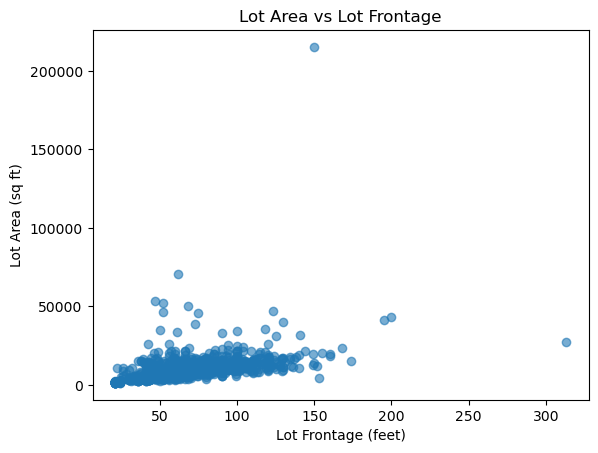

In [64]:
plt.scatter(lot_data['LotFrontage'], lot_data['LotArea'], alpha=0.6)
plt.xlabel('Lot Frontage (feet)')
plt.ylabel('Lot Area (sq ft)')
plt.title('Lot Area vs Lot Frontage')
plt.show()

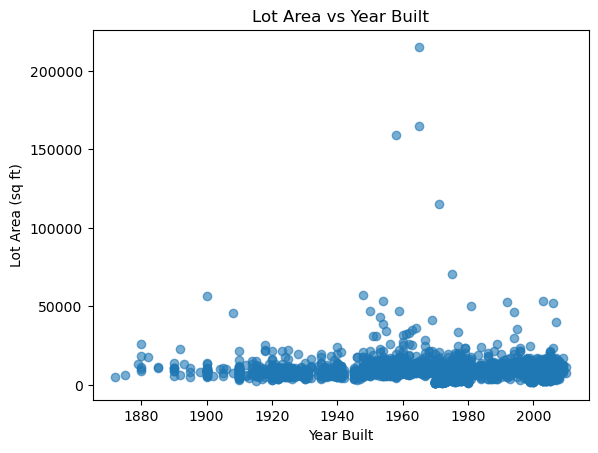

In [65]:
plt.scatter(ames['YearBuilt'], ames['LotArea'], alpha=0.6)
plt.xlabel('Year Built')
plt.ylabel('Lot Area (sq ft)')
plt.title('Lot Area vs Year Built')
plt.show()

In [66]:
lot_data['LotFrontage'].corr(lot_data['LotArea'])

0.46372011530445967

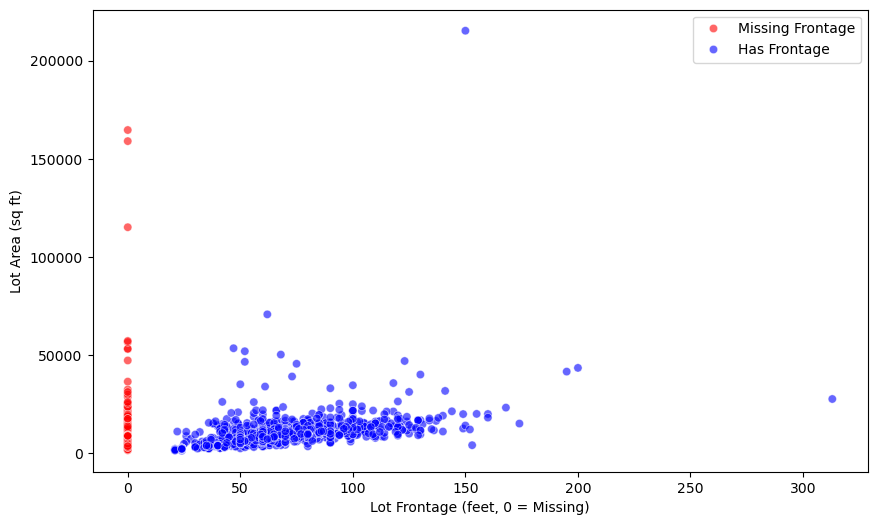

In [67]:
# Create a new column indicating missing status
lot_plot = lot_data.copy()
lot_plot['has_frontage'] = ~lot_plot['LotFrontage'].isna()
lot_plot['no_frontage'] = lot_plot['LotFrontage'].fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lot_plot, 
                x='no_frontage', y='LotArea',
                hue='has_frontage', 
                palette={True: 'blue', False: 'red'},
                alpha=0.6)
# plt.xlabel('Lot Frontage (feet, 0 : Missing)')
# plt.ylabel('Lot Area (sq ft)')
# plt.legend(labels=['Missing Frontage', 'Has Frontage'])
# plt.show()

# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Missing Frontage', 'Has Frontage'])

plt.xlabel('Lot Frontage (feet, 0 = Missing)')
plt.ylabel('Lot Area (sq ft)')
plt.show()

In [68]:
lot_data[lot_data['LotArea'] > 100000]

,LotFrontage,LotArea
249,NaN,159000
355,150.0,215245
1271,NaN,115149
1634,NaN,164660


In [69]:
lot_data.describe()

,LotFrontage,LotArea
count,2118.000000,2580.000000
mean,68.516053,10120.153488
std,22.835831,8126.937892
min,21.000000,1300.000000
25%,57.000000,7406.750000
50%,68.000000,9391.000000
75%,80.000000,11494.000000
max,313.000000,215245.000000


#### Assume square properties
aspect ratio of 1:1

In [71]:
lot_data_ratios_square = lot_data.copy()

In [72]:
import math
# assume each parcel is square. the length of each property is sqrt(LotArea)
lot_data_ratios_square['LotSquareSide'] = np.sqrt(lot_data_ratios_square['LotArea'])

# the total perimeter of the lot is then 4 * the length of the property
lot_data_ratios_square['Perimeter'] = lot_data_ratios_square['LotSquareSide'] * 4

# the ratio of perimeter that is frontage is frontage length / perimeter
lot_data_ratios_square['PercentFrontage'] = lot_data_ratios_square['LotFrontage'] / lot_data_ratios_square['Perimeter']
lot_data_ratios_square

,LotFrontage,LotArea,LotSquareSide,Perimeter,PercentFrontage
0,NaN,7890,88.825672,355.302688,NaN
1,42.0,4235,65.076878,260.307510,0.161348
2,60.0,6060,77.846002,311.384007,0.192688
3,80.0,8146,90.255194,361.020775,0.221594
4,70.0,8400,91.651514,366.606056,0.190941
...,...,...,...,...,...
2575,NaN,8854,94.095696,376.382784,NaN
2576,NaN,13680,116.961532,467.846129,NaN
2577,82.0,6270,79.183332,316.733326,0.258893
2578,NaN,8826,93.946793,375.787174,NaN


In [73]:
# bin data and get counts
bins1 = [0, 0.25, 0.5, 0.75, 1.0]
labels1 = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0']

binned1 = pd.cut(lot_data_ratios_square['PercentFrontage'], bins=bins1, labels=labels1, include_lowest=True)
counts1 = binned1.value_counts().sort_index()
print(counts1)

PercentFrontage
0-0.25      2039
0.25-0.5      78
0.5-0.75       1
0.75-1.0       0
Name: count, dtype: int64


#### Assume rectangular properties for comparison
aspect ratio of 1:4

In [75]:
lot_data_ratios_rectangular = lot_data.copy()

In [76]:
# import math
# assume each parcel is a rectangle of dimensions x and 4x. the length of each property is sqrt(LotArea/4)
lot_data_ratios_rectangular['LotRectangleSide'] = np.sqrt(lot_data_ratios_rectangular['LotArea'] / 4)

# the total perimeter of the lot is then 10 * LotRectangleSide
lot_data_ratios_rectangular['Perimeter'] = lot_data_ratios_rectangular['LotRectangleSide'] * 10

# the ratio of perimeter that is frontage is frontage length / perimeter
lot_data_ratios_rectangular['PercentFrontage'] = lot_data_ratios_rectangular['LotFrontage'] / lot_data_ratios_rectangular['Perimeter']
lot_data_ratios_rectangular

,LotFrontage,LotArea,LotRectangleSide,Perimeter,PercentFrontage
0,NaN,7890,44.412836,444.128360,NaN
1,42.0,4235,32.538439,325.384388,0.129078
2,60.0,6060,38.923001,389.230009,0.154150
3,80.0,8146,45.127597,451.275969,0.177275
4,70.0,8400,45.825757,458.257569,0.152753
...,...,...,...,...,...
2575,NaN,8854,47.047848,470.478480,NaN
2576,NaN,13680,58.480766,584.807661,NaN
2577,82.0,6270,39.591666,395.916658,0.207114
2578,NaN,8826,46.973397,469.733967,NaN


In [77]:
# bin data and get counts
bins2 = [0, 0.25, 0.5, 0.75, 1.0]
labels2 = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0']

binned2 = pd.cut(lot_data_ratios_rectangular['PercentFrontage'], bins=bins2, labels=labels2, include_lowest=True)
counts2 = binned2.value_counts().sort_index()
print(counts2)

PercentFrontage
0-0.25      2104
0.25-0.5      14
0.5-0.75       0
0.75-1.0       0
Name: count, dtype: int64


In [78]:
print(f'Percent Square Frontage:')
print(lot_data_ratios_square[['LotFrontage', 'PercentFrontage']].describe())
print(f'\nPercent Rectangular Frontage:')
print(lot_data_ratios_rectangular[['LotFrontage', 'PercentFrontage']].describe())

Percent Square Frontage:
       LotFrontage  PercentFrontage
count  2118.000000      2118.000000
mean     68.516053         0.179114
std      22.835831         0.040424
min      21.000000         0.050798
25%      57.000000         0.154068
50%      68.000000         0.178831
75%      80.000000         0.201367
max     313.000000         0.596058

Percent Rectangular Frontage:
       LotFrontage  PercentFrontage
count  2118.000000      2118.000000
mean     68.516053         0.143292
std      22.835831         0.032339
min      21.000000         0.040638
25%      57.000000         0.123255
50%      68.000000         0.143065
75%      80.000000         0.161094
max     313.000000         0.476846


In [79]:
print(lot_data['LotFrontage'].describe())

count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [80]:
lot_data['LotFrontage'].mean()

68.51605288007555

In [81]:
lot_data['LotFrontage'].median()

68.0

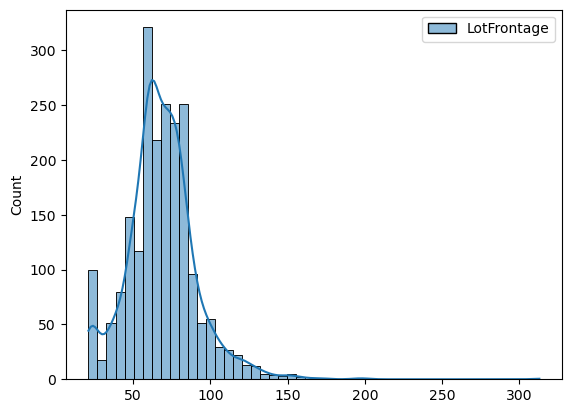

In [82]:
sns.histplot(ames[['LotFrontage']], bins = 50, kde=True)
plt.show()

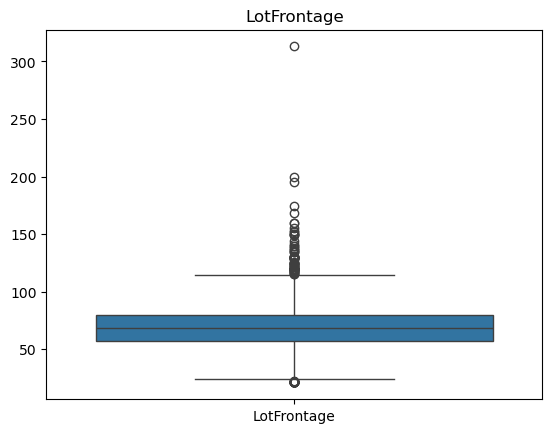

In [83]:
sns.boxplot(ames[['LotFrontage']])
plt.title('LotFrontage')
plt.show()

In [84]:
lot_data_no_missing = lot_data.dropna()
lot_data_no_missing

,LotFrontage,LotArea
1,42.0,4235
2,60.0,6060
3,80.0,8146
4,70.0,8400
5,64.0,7301
...,...,...
2572,84.0,17808
2573,60.0,8550
2574,62.0,7162
2577,82.0,6270


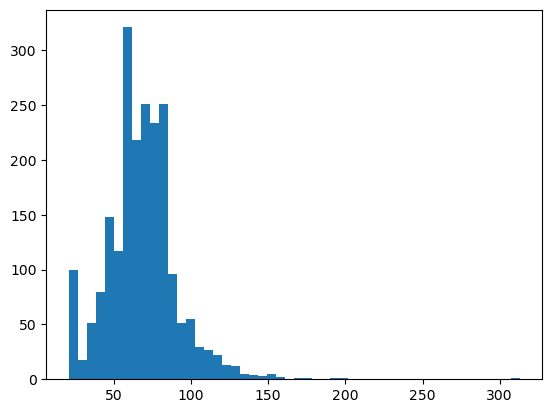

In [85]:
plt.hist(ames[['LotFrontage']], bins=50)
plt.show()

This was fruitless, as expected.

### GarageYrBlt

In [88]:
# Create a new column indicating missing status
garage_yr_plot = ames[['GarageYrBlt', 'YearBuilt']].copy()

In [89]:
garage_yr_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  2451 non-null   float64
 1   YearBuilt    2580 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.4 KB


In [90]:
garage_yr_plot['has_year'] = ~garage_yr_plot['GarageYrBlt'].isna()
garage_yr_plot['missing_year'] = garage_yr_plot['GarageYrBlt'].fillna(1800)
# change missing_year to int64
garage_yr_plot['missing_year'] = garage_yr_plot['missing_year'].astype('int64')
garage_yr_plot.head(20)

,GarageYrBlt,YearBuilt,has_year,missing_year
0,1939.0,1939,True,1939
1,1984.0,1984,True,1984
2,1930.0,1930,True,1930
3,1940.0,1900,True,1940
4,2001.0,2001,True,2001
5,2003.0,2003,True,2003
6,1974.0,1953,True,1974
7,2007.0,2007,True,2007
8,1984.0,1984,True,1984
9,2005.0,2005,True,2005


In [91]:
garage_yr_plot['GarageYrBlt'].nunique()

100

In [92]:
garage_yr_plot['missing_year'].nunique()

101

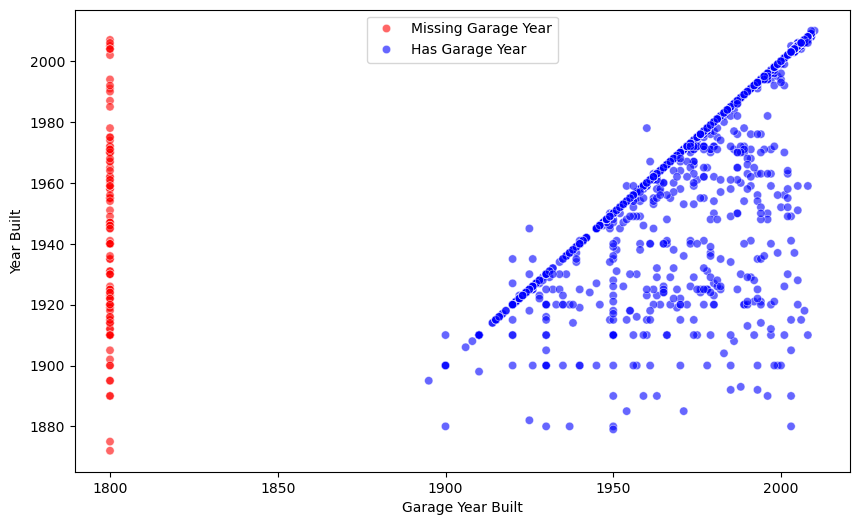

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=garage_yr_plot, 
                x='missing_year', y='YearBuilt',
                hue='has_year', 
                palette={True: 'blue', False: 'red'},
                alpha=0.6)

# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Missing Garage Year', 'Has Garage Year'])
plt.xlabel('Garage Year Built')
plt.ylabel('Year Built')
plt.show()

In [94]:
ames[['GarageYrBlt', 'YearBuilt']].corr()

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.834526
YearBuilt,0.834526,1.000000


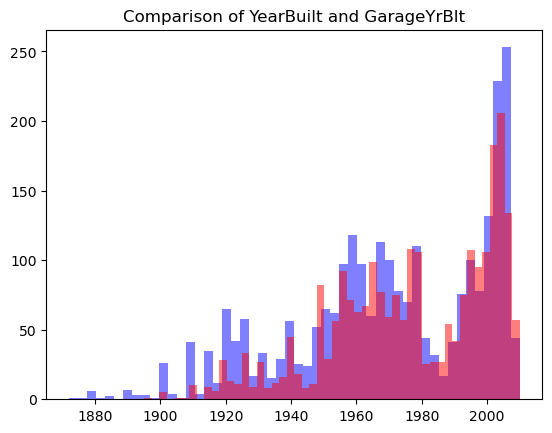

In [95]:
plt.hist(ames[['YearBuilt']], bins=50, alpha=0.5, color='blue')
plt.hist(ames[['GarageYrBlt']], bins=50, alpha=0.5, color='red')
plt.title('Comparison of YearBuilt and GarageYrBlt')
plt.show()

In [96]:
ames[['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
0,1939.0,1939
1,1984.0,1984
2,1930.0,1930
3,1940.0,1900
4,2001.0,2001
...,...,...
2575,1916.0,1916
2576,1955.0,1955
2577,1949.0,1949
2578,2000.0,2000


In [97]:
ames[['GarageYrBlt', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  2451 non-null   float64
 1   YearBuilt    2580 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.4 KB


In [98]:
yr_blt_no_nulls = ames[['GarageYrBlt', 'YearBuilt']].dropna()
yr_blt_no_nulls

,GarageYrBlt,YearBuilt
0,1939.0,1939
1,1984.0,1984
2,1930.0,1930
3,1940.0,1900
4,2001.0,2001
...,...,...
2575,1916.0,1916
2576,1955.0,1955
2577,1949.0,1949
2578,2000.0,2000


In [99]:
yr_blt_no_nulls = yr_blt_no_nulls.astype({'GarageYrBlt': 'int64'})
yr_blt_no_nulls

,GarageYrBlt,YearBuilt
0,1939,1939
1,1984,1984
2,1930,1930
3,1940,1900
4,2001,2001
...,...,...
2575,1916,1916
2576,1955,1955
2577,1949,1949
2578,2000,2000


In [100]:
differences = yr_blt_no_nulls[yr_blt_no_nulls['GarageYrBlt'] != yr_blt_no_nulls['YearBuilt']]
differences

,GarageYrBlt,YearBuilt
3,1940,1900
6,1974,1953
10,2007,2006
11,1993,1991
23,1950,1880
...,...,...
2552,1950,1917
2559,1956,1959
2567,1965,1940
2571,1970,1968


In [101]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [102]:
# Is there a relation with the remodel year? (YearRemodAdd is also highly correlated with GarageYrBlt)
differences_w_remodel = differences.join(ames[['YearRemodAdd']], how='left')
differences_w_remodel.head()

,GarageYrBlt,YearBuilt,YearRemodAdd
3,1940,1900,2003
6,1974,1953,1953
10,2007,2006,2007
11,1993,1991,1991
23,1950,1880,2003


### Compare GarageYrBlt imputed with mean (or median) and GarageYrBlt imputed with YearBuilt

In [104]:
garage_impute_yrbuilt = ames[['GarageYrBlt', 'YearBuilt', 'SalePrice']].copy()
garage_impute_yrbuilt.head(40)

,GarageYrBlt,YearBuilt,SalePrice
0,1939.0,1939,126000
1,1984.0,1984,139500
2,1930.0,1930,124900
3,1940.0,1900,114000
4,2001.0,2001,227000
5,2003.0,2003,198500
6,1974.0,1953,93000
7,2007.0,2007,187687
8,1984.0,1984,137500
9,2005.0,2005,140000


In [105]:
garage_impute_yrbuilt.isnull().sum()

GarageYrBlt    129
YearBuilt        0
SalePrice        0
dtype: int64

In [106]:
garage_impute_yrbuilt['GarageYrBlt'] = garage_impute_yrbuilt['GarageYrBlt'].fillna(garage_impute_yrbuilt['YearBuilt'])

In [107]:
garage_impute_yrbuilt.isnull().sum()

GarageYrBlt    0
YearBuilt      0
SalePrice      0
dtype: int64

In [108]:
garage_impute_median = ames[['GarageYrBlt', 'YearBuilt', 'SalePrice']].copy()
garage_impute_median

,GarageYrBlt,YearBuilt,SalePrice
0,1939.0,1939,126000
1,1984.0,1984,139500
2,1930.0,1930,124900
3,1940.0,1900,114000
4,2001.0,2001,227000
...,...,...,...
2575,1916.0,1916,121000
2576,1955.0,1955,139600
2577,1949.0,1949,145000
2578,2000.0,2000,217500


In [109]:
garage_impute_median.isnull().sum()

GarageYrBlt    129
YearBuilt        0
SalePrice        0
dtype: int64

In [110]:
garage_impute_median['GarageYrBlt'].median()

1978.0

In [111]:
garage_impute_median['GarageYrBlt'] = garage_impute_median['GarageYrBlt'].fillna(garage_impute_median['GarageYrBlt'].median())

In [112]:
garage_impute_median.isnull().sum()

GarageYrBlt    0
YearBuilt      0
SalePrice      0
dtype: int64

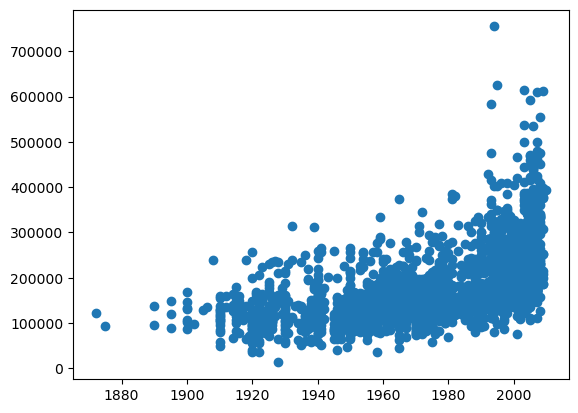

In [113]:
plt.scatter(x=garage_impute_yrbuilt['GarageYrBlt'], y=garage_impute_yrbuilt['SalePrice'])
plt.show()

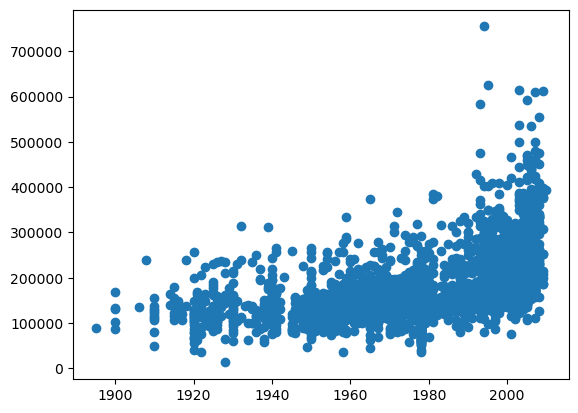

In [114]:
plt.scatter(x=garage_impute_median['GarageYrBlt'], y=garage_impute_median['SalePrice'])
plt.show()

In [115]:
garage_data = ames[['GarageYrBlt', 'YearBuilt', 'SalePrice']].copy()

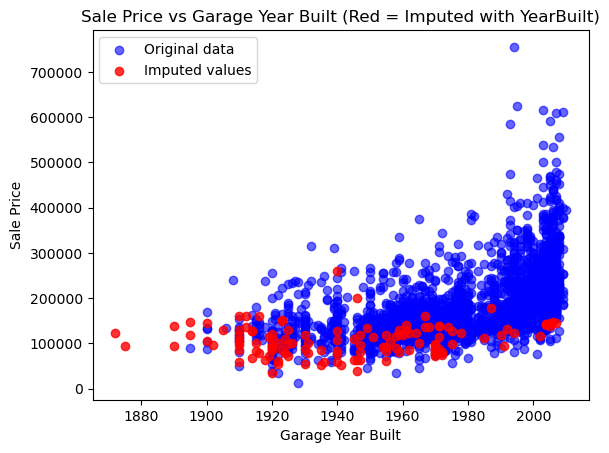

In [116]:
# 'garage_data' original data with NaN values
# 'garage_impute_yrbuilt' imputed with YearBuilt values

# Create a mask for originally missing values
was_missing = garage_data['GarageYrBlt'].isna()

# Plot non-imputed values in blue
plt.scatter(garage_impute_yrbuilt.loc[~was_missing, 'GarageYrBlt'], 
           garage_impute_yrbuilt.loc[~was_missing, 'SalePrice'], 
           color='blue', alpha=0.6, label='Original data')

# Plot imputed values in red
plt.scatter(garage_impute_yrbuilt.loc[was_missing, 'GarageYrBlt'], 
           garage_impute_yrbuilt.loc[was_missing, 'SalePrice'], 
           color='red', alpha=0.8, label='Imputed values')

plt.xlabel('Garage Year Built')
plt.ylabel('Sale Price')
plt.legend()
plt.title('Sale Price vs Garage Year Built (Red = Imputed with YearBuilt)')
plt.show()

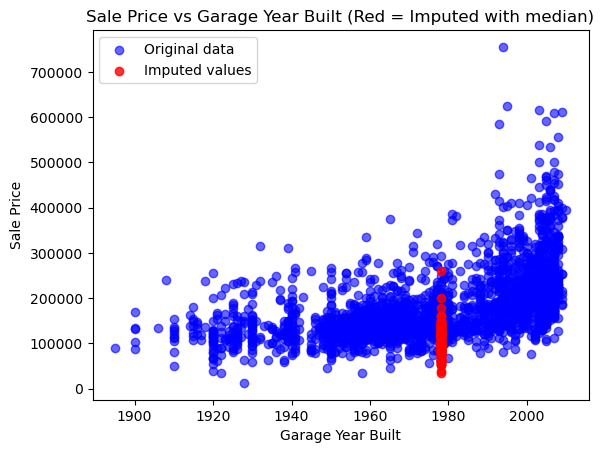

In [117]:
# 'garage_data' is original data with NaN values
# 'garage_impute_median' is imputed with median values

# Create a mask for originally missing values
was_missing = garage_data['GarageYrBlt'].isna()

# Plot non-imputed values in blue
plt.scatter(garage_impute_median.loc[~was_missing, 'GarageYrBlt'], 
           garage_impute_median.loc[~was_missing, 'SalePrice'], 
           color='blue', alpha=0.6, label='Original data')

# Plot imputed values in red
plt.scatter(garage_impute_median.loc[was_missing, 'GarageYrBlt'], 
           garage_impute_median.loc[was_missing, 'SalePrice'], 
           color='red', alpha=0.8, label='Imputed values')

plt.xlabel('Garage Year Built')
plt.ylabel('Sale Price')
plt.legend()
plt.title('Sale Price vs Garage Year Built (Red = Imputed with median)')
plt.show()

# Less than 1% missing - continuous features: 

- MasVnrArea (14 missing values)                       
- GarageArea (1)            
- TotalBsmtSF (1)             
- BsmtUnfSF (1)                 
- BsmtFinSF2 (1)              
- BsmtFinSF1 (1)

In [119]:
ames[['MasVnrArea',                         
    'GarageArea',         
    'TotalBsmtSF',              
    'BsmtUnfSF',                  
    'BsmtFinSF2',                
    'BsmtFinSF1']].describe()

,MasVnrArea,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1
count,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,99.308262,466.842575,1036.686700,539.101590,53.238852,444.346258
std,175.872330,207.476842,418.555417,425.199639,174.423920,429.334957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,318.000000,792.000000,215.000000,0.000000,0.000000
50%,0.000000,474.000000,979.000000,448.000000,0.000000,384.000000
75%,158.000000,576.000000,1266.500000,784.000000,0.000000,732.000000
max,1600.000000,1488.000000,3206.000000,2336.000000,1526.000000,2288.000000


In [120]:
ames[['MasVnrArea',                         
    'GarageArea',         
    'TotalBsmtSF',              
    'BsmtUnfSF',                  
    'BsmtFinSF2',                
    'BsmtFinSF1']].median()

MasVnrArea       0.0
GarageArea     474.0
TotalBsmtSF    979.0
BsmtUnfSF      448.0
BsmtFinSF2       0.0
BsmtFinSF1     384.0
dtype: float64

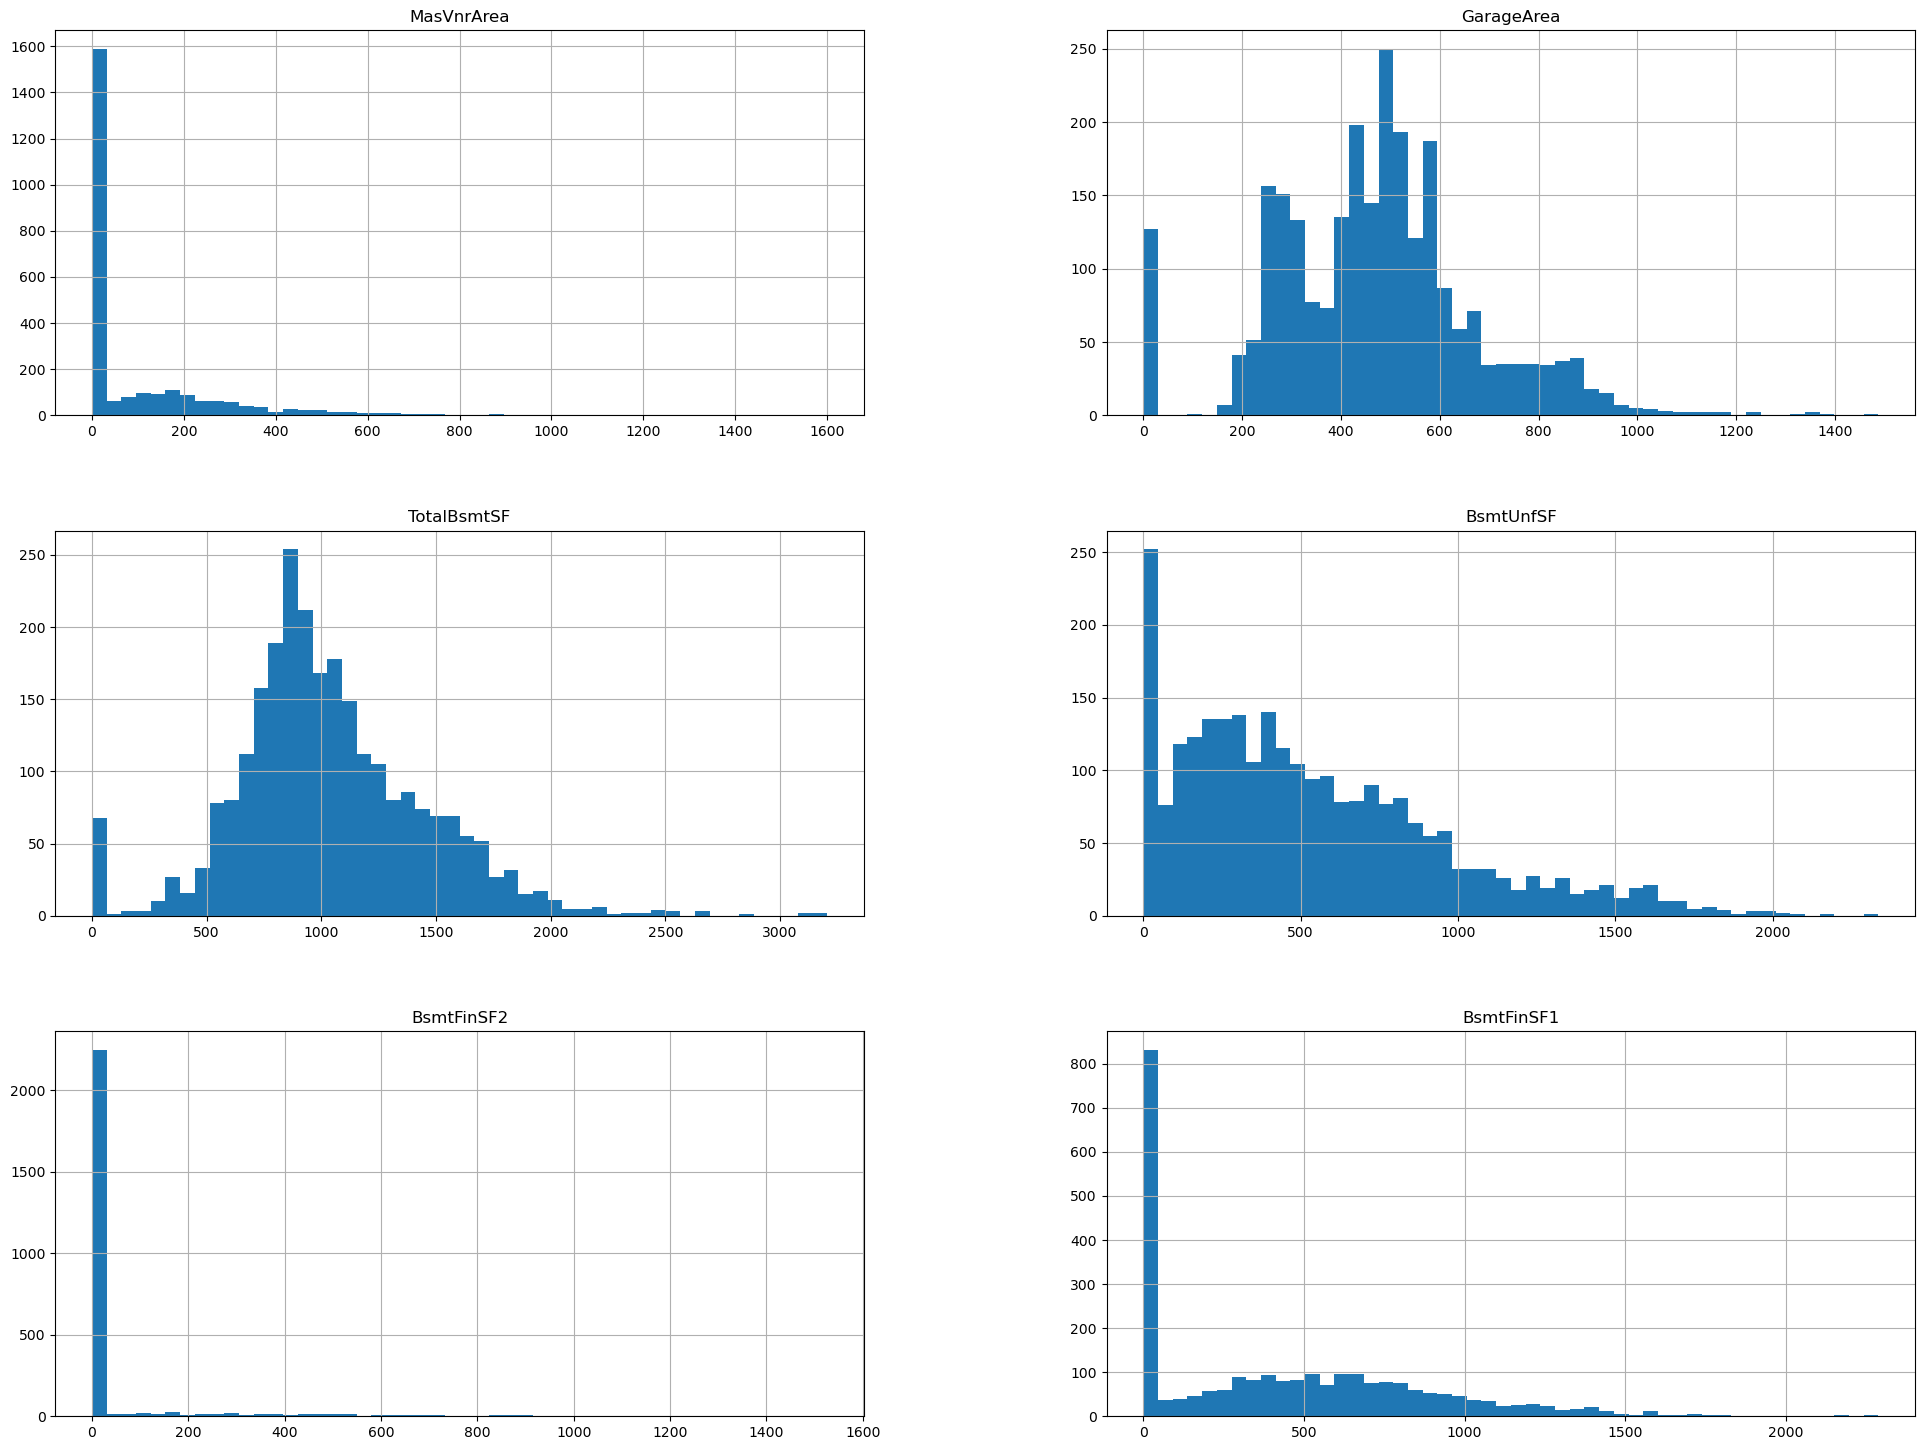

In [121]:
ames[['MasVnrArea',                         
    'GarageArea',         
    'TotalBsmtSF',              
    'BsmtUnfSF',                  
    'BsmtFinSF2',                
    'BsmtFinSF1']].hist(bins=50, figsize=(24,18));

In [122]:
zero_counts = ames[['MasVnrArea',                         
    'GarageArea',         
    'TotalBsmtSF',              
    'BsmtUnfSF',                  
    'BsmtFinSF2',                
    'BsmtFinSF1']]

In [123]:
for feat in zero_counts.columns:
    print(feat, zero_counts[feat].value_counts()[0])    

MasVnrArea 1554
GarageArea 127
TotalBsmtSF 68
BsmtUnfSF 216
BsmtFinSF2 2248
BsmtFinSF1 774


In [124]:
ames[ames['GarageArea'] == 0.0]['GarageCars'].value_counts()

GarageCars
0.0    127
Name: count, dtype: int64

In [125]:
ames[ames['GarageArea'].isna()]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
433,1828,150909,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [126]:
ames[ames['GarageArea'].isna()]['GarageCars']

433   NaN
Name: GarageCars, dtype: float64

# Less than 1% missing - discrete features: 

- BsmtFullBath (2 values missing)        
- BsmtHalfBath (2) 
- GarageCars (1)

In [128]:
ames[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].describe()

,BsmtFullBath,BsmtHalfBath,GarageCars
count,2578.000000,2578.000000,2579.000000
mean,0.435221,0.062064,1.747577
std,0.518827,0.244513,0.738678
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,2.000000
75%,1.000000,0.000000,2.000000
max,3.000000,2.000000,5.000000


In [129]:
print(ames['BsmtFullBath'].value_counts())
print(ames['BsmtHalfBath'].value_counts())
print(ames['GarageCars'].value_counts())

BsmtFullBath
0.0    1485
1.0    1065
2.0      27
3.0       1
Name: count, dtype: int64
BsmtHalfBath
0.0    2420
1.0     156
2.0       2
Name: count, dtype: int64
GarageCars
2.0    1439
1.0     713
3.0     285
0.0     127
4.0      14
5.0       1
Name: count, dtype: int64


In [130]:
ames[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].mode()

,BsmtFullBath,BsmtHalfBath,GarageCars
0,0.0,0.0,2.0


In [131]:
ames[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].median()

BsmtFullBath    0.0
BsmtHalfBath    0.0
GarageCars      2.0
dtype: float64

In [132]:
ames[ames['GarageCars'].isna()]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
433,1828,150909,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [133]:
ames.iloc[433][['SalePrice', 'GarageCars', 'GarageYrBlt', 'GarageArea', 'GarageFinish', 'GarageType']]

SalePrice       150909
GarageCars         NaN
GarageYrBlt        NaN
GarageArea         NaN
GarageFinish       NaN
GarageType      Detchd
Name: 433, dtype: object

In [134]:
ames['GarageType'].value_counts()

GarageType
Attchd     1527
Detchd      716
BuiltIn     153
Basment      27
2Types       21
CarPort       9
Name: count, dtype: int64

In [135]:
ames.groupby('GarageType')['SalePrice'].mean()

GarageType
2Types     154080.952381
Attchd     200661.569090
Basment    155150.000000
BuiltIn    233054.464052
CarPort    110716.666667
Detchd     133291.765363
Name: SalePrice, dtype: float64

#### Using median imputation for numerical features

In [137]:
missing_info.head(60)

,Missing Values,Percentage,Data Type
PoolQC,2571,99.651163,object
MiscFeature,2483,96.240310,object
Alley,2412,93.488372,object
Fence,2055,79.651163,object
MasVnrType,1573,60.968992,object
FireplaceQu,1241,48.100775,object
LotFrontage,462,17.906977,float64
GarageQual,129,5.000000,object
GarageFinish,129,5.000000,object
GarageYrBlt,129,5.000000,float64


In [138]:
# Separating numerical and categorical features
# np.number above only returned 'float' types, excluding 'int' types. Need both.
numerical_features = ames.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ames.select_dtypes(include=['object']).columns
 
# Displaying the separated lists
print(f'Number of numerical features: {len(numerical_features)}')
print("Numerical Features:", numerical_features)
print(f'\nNumber of categorical features: {len(categorical_features)}')
print("Categorical Features:", categorical_features)

Number of numerical features: 32
Numerical Features: Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Number of categorical features: 48
Categorical Features: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', '

#### Data imputation for numerical feature: GarageYrBlt
Test on reduced dataset first

In [140]:
ames_raw[['GarageYrBlt', 'YearBuilt']].head(25)

,GarageYrBlt,YearBuilt
0,1939.0,1939
1,1984.0,1984
2,1930.0,1930
3,1940.0,1900
4,2001.0,2001
5,2003.0,2003
6,1974.0,1953
7,2007.0,2007
8,1984.0,1984
9,2005.0,2005


In [141]:
garage_yr_imputed = ames_raw[['GarageYrBlt', 'YearBuilt']].copy()

# impute missing GarageYrBlt with corresponding YearBuilt
garage_yr_imputed['GarageYrBlt'] = garage_yr_imputed['GarageYrBlt'].fillna(garage_yr_imputed['YearBuilt'])

# check the first few NaN observations before and after imputation
print('Before imputation:')
print(ames_raw[['GarageYrBlt', 'YearBuilt']].iloc[17])
print(ames_raw[['GarageYrBlt', 'YearBuilt']].iloc[22])

print('\nAfter imputation:')
print(garage_yr_imputed.iloc[17])
print(garage_yr_imputed.iloc[22])

Before imputation:
GarageYrBlt       NaN
YearBuilt      1914.0
Name: 17, dtype: float64
GarageYrBlt       NaN
YearBuilt      1970.0
Name: 22, dtype: float64

After imputation:
GarageYrBlt    1914.0
YearBuilt      1914.0
Name: 17, dtype: float64
GarageYrBlt    1970.0
YearBuilt      1970.0
Name: 22, dtype: float64


Text(0, 0.5, 'Frequency')

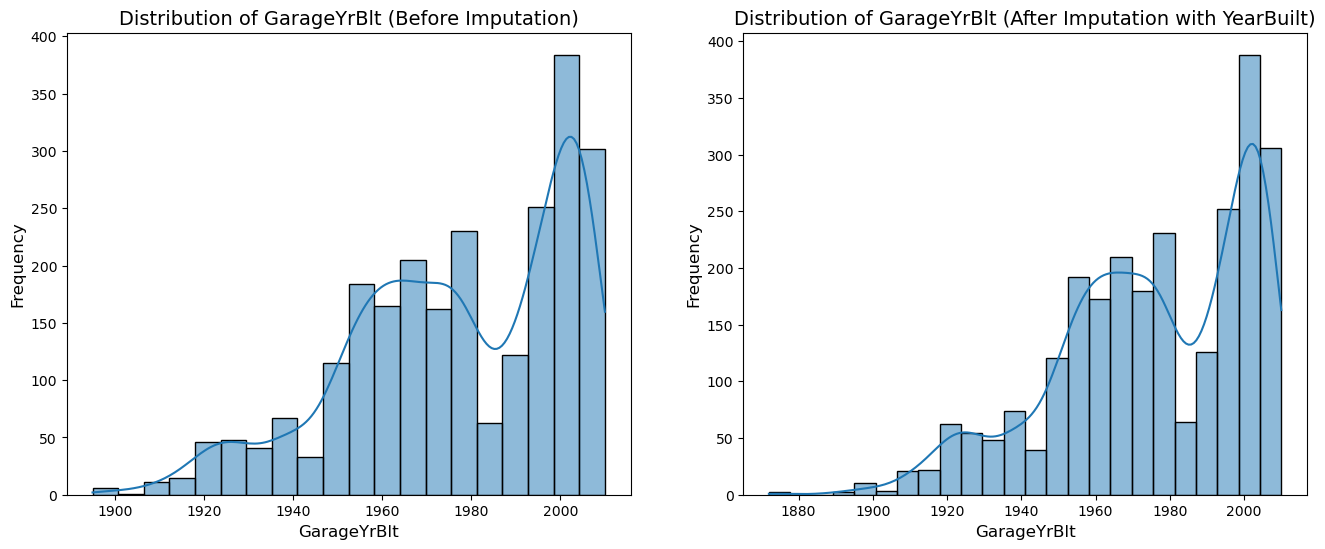

In [142]:
# Visualize before and after imputations
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=ames_raw, x='GarageYrBlt', kde=True, ax=axs[0])
axs[0].set_title('Distribution of GarageYrBlt (Before Imputation)', fontsize=14)
axs[0].set_xlabel('GarageYrBlt', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=garage_yr_imputed, x='GarageYrBlt', kde=True, ax=axs[1])
axs[1].set_title('Distribution of GarageYrBlt (After Imputation with YearBuilt)', fontsize=14)
axs[1].set_xlabel('GarageYrBlt', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

#### This looks good. 
- Impute ames dataset
- Change GarageYrBlt dtype to 'int64'

In [144]:
# impute missing GarageYrBlt with corresponding YearBuilt
ames['GarageYrBlt'] = ames['GarageYrBlt'].fillna(ames['YearBuilt'])

In [145]:
ames['GarageYrBlt'].head(25)

0     1939.0
1     1984.0
2     1930.0
3     1940.0
4     2001.0
5     2003.0
6     1974.0
7     2007.0
8     1984.0
9     2005.0
10    2007.0
11    1993.0
12    1920.0
13    1963.0
14    2002.0
15    1993.0
16    2005.0
17    1914.0
18    1977.0
19    1993.0
20    2006.0
21    1948.0
22    1970.0
23    1950.0
24    1997.0
Name: GarageYrBlt, dtype: float64

Looks great. Change the datatype.

In [147]:
ames[['GarageYrBlt', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  2580 non-null   float64
 1   YearBuilt    2580 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.4 KB


In [148]:
ames['GarageYrBlt'] = ames['GarageYrBlt'].astype('int64')

In [149]:
ames['GarageYrBlt'].head(2)

0    1939
1    1984
Name: GarageYrBlt, dtype: int64

In [150]:
ames['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2580 entries, 0 to 2579
Series name: GarageYrBlt
Non-Null Count  Dtype
--------------  -----
2580 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


In [151]:
print(ames_raw['GarageYrBlt'].isnull().sum())
print(ames['GarageYrBlt'].isnull().sum())

129
0


Great. Looks good. 

#### Data imputation for remaining numerical features with missing values
Impute remaining numerical features with median values.

In [154]:
missing_data = ames.isnull().sum()

missing_percentage = (missing_data / len(ames)) * 100
data_type = ames.dtypes

data = {'Missing Values': missing_data,
        'Percentage': missing_percentage,
        'Data Type': data_type}

missing_info = pd.DataFrame(data)
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

In [155]:
missing_data[missing_data != 0]

LotFrontage      462
Alley           2412
MasVnrType      1573
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

GarageYrBlt no longer in missing data

In [157]:
# list only the numerical features with missing data
print(missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == np.number)])

              Missing Values  Percentage Data Type
LotFrontage              462   17.906977   float64
MasVnrArea                14    0.542636   float64
BsmtFullBath               2    0.077519   float64
BsmtHalfBath               2    0.077519   float64
BsmtFinSF1                 1    0.038760   float64
GarageArea                 1    0.038760   float64
GarageCars                 1    0.038760   float64
BsmtUnfSF                  1    0.038760   float64
TotalBsmtSF                1    0.038760   float64
BsmtFinSF2                 1    0.038760   float64


In [158]:
# create storage for median imputation
imputation_info = pd.DataFrame(columns=[
    'Feature', 
    'Missing Values after Imputation',
    'Median Value used for Imputation'
])

In [159]:
print(missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == np.number)])

              Missing Values  Percentage Data Type
LotFrontage              462   17.906977   float64
MasVnrArea                14    0.542636   float64
BsmtFullBath               2    0.077519   float64
BsmtHalfBath               2    0.077519   float64
BsmtFinSF1                 1    0.038760   float64
GarageArea                 1    0.038760   float64
GarageCars                 1    0.038760   float64
BsmtUnfSF                  1    0.038760   float64
TotalBsmtSF                1    0.038760   float64
BsmtFinSF2                 1    0.038760   float64


In [160]:
# identify missing numerical features
num_features_missing = missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == np.number)]
num_features_missing

,Missing Values,Percentage,Data Type
LotFrontage,462,17.906977,float64
MasVnrArea,14,0.542636,float64
BsmtFullBath,2,0.077519,float64
BsmtHalfBath,2,0.077519,float64
BsmtFinSF1,1,0.038760,float64
GarageArea,1,0.038760,float64
GarageCars,1,0.038760,float64
BsmtUnfSF,1,0.038760,float64
TotalBsmtSF,1,0.038760,float64
BsmtFinSF2,1,0.038760,float64


In [161]:
ames['GarageYrBlt'].isnull().sum()

0

In [162]:
# impute missing numerical features
num_features_missing.index.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtFinSF1',
 'GarageArea',
 'GarageCars',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinSF2']

In [163]:
for el in num_features_missing.index.tolist():
    median_value = ames[el].median(skipna=True)
    ames.loc[:, el].fillna(median_value)
    imp_value = ames[el].isnull().sum()

    # store imputation data
    imputation_info.loc[len(imputation_info)] = pd.Series({
        'Feature': el,
        'Median Value used for Imputation': median_value,
        'Missing Values after Imputation': imp_value
    })

print(imputation_info)

        Feature Missing Values after Imputation  \
0   LotFrontage                             462   
1    MasVnrArea                              14   
2  BsmtFullBath                               2   
3  BsmtHalfBath                               2   
4    BsmtFinSF1                               1   
5    GarageArea                               1   
6    GarageCars                               1   
7     BsmtUnfSF                               1   
8   TotalBsmtSF                               1   
9    BsmtFinSF2                               1   

  Median Value used for Imputation  
0                             68.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                            384.0  
5                            474.0  
6                              2.0  
7                            448.0  
8                            979.0  
9                              0.0  


In [164]:
print(ames_raw[num_features_missing.index].isnull().sum())

LotFrontage     462
MasVnrArea       14
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
GarageArea        1
GarageCars        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFinSF2        1
dtype: int64


In [165]:
print(ames[num_features_missing.index].isnull().sum())

LotFrontage     462
MasVnrArea       14
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
GarageArea        1
GarageCars        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFinSF2        1
dtype: int64


## Categorical Feature Imputation
[Return To Top](#Contents)

#### Data imputation for categorical features with missing values

In [168]:
# list only the categorical features with missing data
print(missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == 'object')])

              Missing Values  Percentage Data Type
PoolQC                  2571   99.651163    object
MiscFeature             2483   96.240310    object
Alley                   2412   93.488372    object
Fence                   2055   79.651163    object
MasVnrType              1573   60.968992    object
FireplaceQu             1241   48.100775    object
GarageCond               129    5.000000    object
GarageFinish             129    5.000000    object
GarageQual               129    5.000000    object
GarageType               127    4.922481    object
BsmtExposure              71    2.751938    object
BsmtFinType2              70    2.713178    object
BsmtFinType1              69    2.674419    object
BsmtQual                  69    2.674419    object
BsmtCond                  69    2.674419    object
Electrical                 1    0.038760    object


In [169]:
# all the categorical features
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Impute 'Electrical' feature

In [171]:
# use the mode value for imputing the 'Electrical' feature
ames['Electrical'].mode()[0]

'SBrkr'

In [172]:
mode_value = ames['Electrical'].mode()[0]
ames.loc[:, 'Electrical'] = ames['Electrical'].fillna(mode_value)

In [173]:
ames_raw['Electrical'].isnull().sum()

1

In [174]:
ames['Electrical'].isnull().sum()

0

#### Handle remaining categorical features missing data

In [176]:
missing_data = ames.isnull().sum()

missing_percentage = (missing_data / len(ames)) * 100
data_type = ames.dtypes

data = {'Missing Values': missing_data,
        'Percentage': missing_percentage,
        'Data Type': data_type}

missing_info = pd.DataFrame(data)
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

In [177]:
missing_info[missing_info['Missing Values'] != 0]

,Missing Values,Percentage,Data Type
PoolQC,2571,99.651163,object
MiscFeature,2483,96.240310,object
Alley,2412,93.488372,object
Fence,2055,79.651163,object
MasVnrType,1573,60.968992,object
FireplaceQu,1241,48.100775,object
LotFrontage,462,17.906977,float64
GarageFinish,129,5.000000,object
GarageQual,129,5.000000,object
GarageCond,129,5.000000,object


**Note:** Electrical no longer missing values

### garage features

In [180]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [181]:
garage_features = ames_raw[[
    'GarageCars', 
    'GarageQual', 
    'GarageCond', 
    'GarageFinish', 
    'GarageType', 
    'GarageYrBlt', 
    'GarageArea'
]]

In [182]:
garage_features

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
0,2.0,TA,TA,Unf,Detchd,1939.0,399.0
1,1.0,TA,TA,Fin,Attchd,1984.0,266.0
2,1.0,TA,Po,Unf,Detchd,1930.0,216.0
3,1.0,TA,TA,Unf,Detchd,1940.0,281.0
4,2.0,TA,TA,Fin,Attchd,2001.0,528.0
...,...,...,...,...,...,...,...
2575,1.0,Fa,Po,Unf,Detchd,1916.0,192.0
2576,2.0,TA,TA,Unf,Attchd,1955.0,452.0
2577,3.0,TA,TA,Unf,2Types,1949.0,871.0
2578,2.0,TA,TA,Fin,Attchd,2000.0,486.0


In [183]:
garage_features.isnull().sum()

GarageCars        1
GarageQual      129
GarageCond      129
GarageFinish    129
GarageType      127
GarageYrBlt     129
GarageArea        1
dtype: int64

In [184]:
# mask for missing garage features
garage_mask = garage_features.isnull()
garage_mask

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2575,False,False,False,False,False,False,False
2576,False,False,False,False,False,False,False
2577,False,False,False,False,False,False,False
2578,False,False,False,False,False,False,False


In [185]:
# find which rows have missing data
row_mask = garage_mask.any(axis=1)
row_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2575    False
2576    False
2577    False
2578    False
2579    False
Length: 2580, dtype: bool

In [186]:
# return data for rows with missing data 
garage_missing_info = garage_features[row_mask]
garage_missing_info

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
17,0.0,NaN,NaN,NaN,NaN,NaN,0.0
22,0.0,NaN,NaN,NaN,NaN,NaN,0.0
44,0.0,NaN,NaN,NaN,NaN,NaN,0.0
48,0.0,NaN,NaN,NaN,NaN,NaN,0.0
50,0.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
2481,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2488,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2513,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2540,0.0,NaN,NaN,NaN,NaN,NaN,0.0


I am assuming that the 127 rows with NaNs everywhere mean that there is simply no garage

GarageType and GarageCars may have additional information to consider

In [189]:
garage_missing_info['GarageCars'].value_counts()

GarageCars
0.0    127
1.0      1
Name: count, dtype: int64

In [190]:
garage_missing_info[garage_missing_info['GarageCars'] == 1.0]

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
531,1.0,NaN,NaN,NaN,Detchd,NaN,360.0


In [191]:
garage_missing_info['GarageType'].value_counts()

GarageType
Detchd    2
Name: count, dtype: int64

In [192]:
garage_missing_info[garage_missing_info['GarageType'] == 'Detchd']

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
433,NaN,NaN,NaN,NaN,Detchd,NaN,NaN
531,1.0,NaN,NaN,NaN,Detchd,NaN,360.0


In [193]:
garage_features[garage_features['GarageType'] == 'Detchd']

,GarageCars,GarageQual,GarageCond,GarageFinish,GarageType,GarageYrBlt,GarageArea
0,2.0,TA,TA,Unf,Detchd,1939.0,399.0
2,1.0,TA,Po,Unf,Detchd,1930.0,216.0
3,1.0,TA,TA,Unf,Detchd,1940.0,281.0
6,2.0,TA,TA,Unf,Detchd,1974.0,576.0
11,2.0,TA,TA,Unf,Detchd,1993.0,576.0
...,...,...,...,...,...,...,...
2565,2.0,TA,TA,Fin,Detchd,2006.0,625.0
2567,2.0,TA,TA,Fin,Detchd,1965.0,720.0
2570,1.0,TA,TA,Unf,Detchd,1965.0,384.0
2571,1.0,TA,TA,Unf,Detchd,1970.0,308.0


Two observations have Detached garages with little or no other info about the garages. 
Imputing with 'None' is fine.

Other features with missing data are just presumed incomplete, without additional data from which to infer any information. 

#### Impute missing categorical values with 'None'

In [196]:
# select categorical features with missing data
missing_categorical = missing_info[(missing_info['Missing Values'] > 0) 
      & (missing_info['Data Type'] == 'object')]

In [197]:
missing_categorical

,Missing Values,Percentage,Data Type
PoolQC,2571,99.651163,object
MiscFeature,2483,96.240310,object
Alley,2412,93.488372,object
Fence,2055,79.651163,object
MasVnrType,1573,60.968992,object
FireplaceQu,1241,48.100775,object
GarageFinish,129,5.000000,object
GarageQual,129,5.000000,object
GarageCond,129,5.000000,object
GarageType,127,4.922481,object


In [198]:
missing_categorical.index.to_list()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageType',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtCond']

In [199]:
# impute the missing data with 'None' values
for el in missing_categorical.index.to_list():
    ames.loc[:, el] = ames[el].fillna("None")
    
print(ames[missing_categorical.index].isnull().sum())

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
MasVnrType      0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageType      0
BsmtExposure    0
BsmtFinType2    0
BsmtQual        0
BsmtFinType1    0
BsmtCond        0
dtype: int64


In [200]:
ames.isnull().sum().sum()

486

In [201]:
ames.isnull().sum().sum()

486

# Outlier Analysis

[Return To Top](#Contents)

"There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students." -De Cock

Should be using ames_clean here, but there are no differences between ames and ames_clean for SalePrice and GrLivArea... 

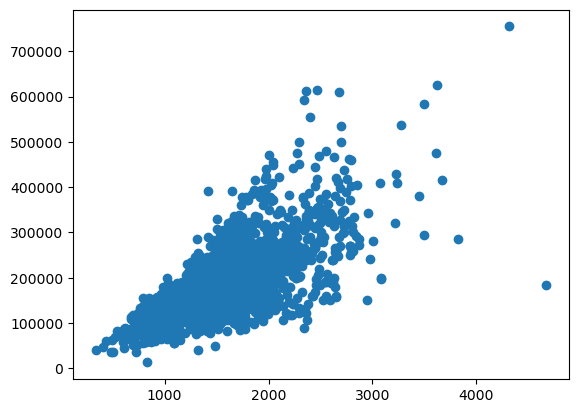

In [205]:
plt.scatter(x=ames['GrLivArea'], y=ames['SalePrice']);

In [206]:
ames['SaleType'].value_counts()

SaleType
WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: count, dtype: int64

In [207]:
large_homes = ames[ames['GrLivArea'] > 4000]
large_homes

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,4676,184750,60,RL,130.0,40094,Pave,None,IR1,Bnk,...,0,0,None,None,None,0,10,2007,New,Partial
1007,4316,755000,60,RL,104.0,21535,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,1,2007,WD,Normal


In [208]:
X_outlier = ames['GrLivArea']
y_outlier = ames['SalePrice']

In [209]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

x_outlier = sm.add_constant(X_outlier)
ols = sm.OLS(y_outlier, x_outlier).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2775.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:46:35   Log-Likelihood:                -31680.
No. Observations:                2580   AIC:                         6.336e+04
Df Residuals:                    2578   BIC:                         6.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.378e+04   3283.025      4.196      0.0

The equation for the model with the outliers is:
$$ y_{pred} = const + GrLivArea_{coeff} * X_{outlier} $$

In [211]:
np.array(X_outlier)

array([ 856, 1049, 1001, ..., 2002, 1842, 1911])

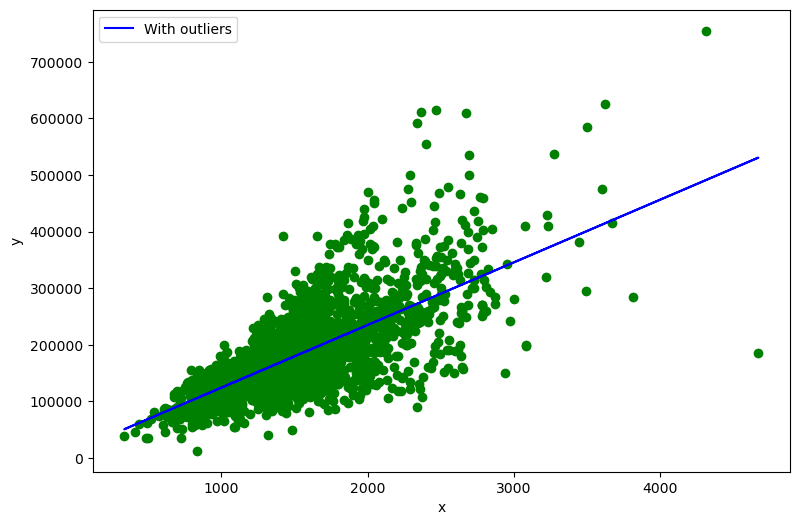

In [212]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(X_outlier), 1.378e+04 + 110.5515*np.array(X_outlier), c='b', lw=1.5, label='With outliers')
plt.scatter(X_outlier, y_outlier, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [213]:
large_homes

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,4676,184750,60,RL,130.0,40094,Pave,None,IR1,Bnk,...,0,0,None,None,None,0,10,2007,New,Partial
1007,4316,755000,60,RL,104.0,21535,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,1,2007,WD,Normal


In [214]:
ames_no_outlier = ames[['GrLivArea', 'SalePrice']]
print(ames_no_outlier.iloc[308:311])
print(f'***')
print(ames_no_outlier.iloc[1006:1009])

     GrLivArea  SalePrice
308       2063     315000
309       4676     184750
310        854     132000
***
      GrLivArea  SalePrice
1006       1342     105000
1007       4316     755000
1008       2237     204000


In [215]:
ames_no_outlier = ames_no_outlier.copy()
ames_no_outlier.drop([309, 1007], inplace=True)

In [216]:
X_no_outlier = ames_no_outlier['GrLivArea']
y_no_outlier = ames_no_outlier['SalePrice']

In [217]:
print(X_no_outlier.iloc[308:311])
print(f'***')
print(X_no_outlier.iloc[1004:1009])

308    2063
310     854
311    1400
Name: GrLivArea, dtype: int64
***
1005    1607
1006    1342
1008    2237
1009    2422
1010    1690
Name: GrLivArea, dtype: int64


In [218]:
x_no_outlier = sm.add_constant(X_no_outlier)
ols = sm.OLS(y_no_outlier, x_no_outlier).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2796.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:46:35   Log-Likelihood:                -31621.
No. Observations:                2578   AIC:                         6.325e+04
Df Residuals:                    2576   BIC:                         6.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.292e+04   3279.119      3.941      0.0

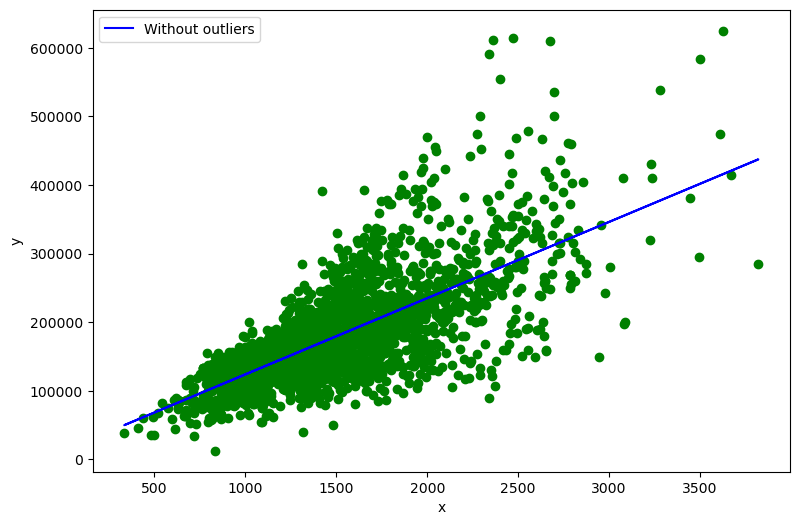

In [219]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(X_no_outlier), 1.292e+04 + 111.1479*np.array(X_no_outlier), c='b', lw=1.5, label='Without outliers')
plt.scatter(X_no_outlier, y_no_outlier, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [225]:
y = ames['SalePrice']

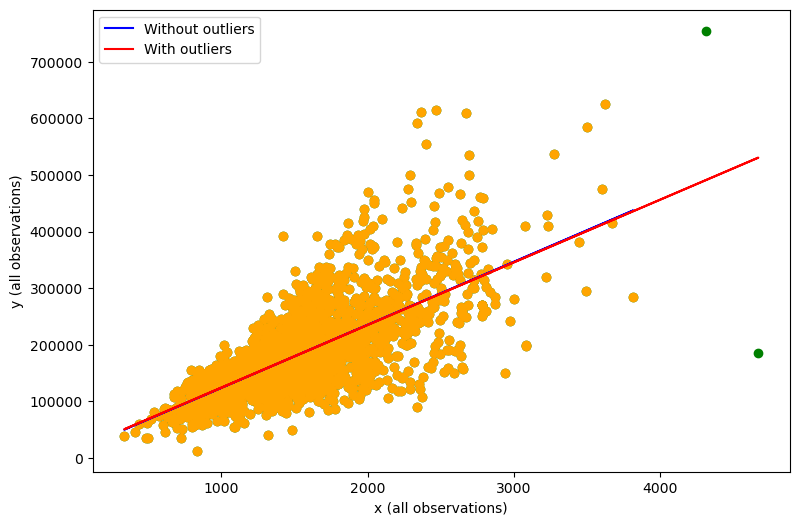

In [227]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(X_no_outlier), 1.292e+04 + 111.1479*np.array(X_no_outlier), c='b', lw=1.5, label='Without outliers')
plt.plot(np.array(X_outlier), 1.378e+04 + 110.5515*np.array(X_outlier), c='r', lw=1.5, label='With outliers')
plt.scatter(X_outlier, y, color='green')
plt.scatter(X_no_outlier, y_no_outlier, color='orange')
plt.xlabel('x (all observations)')
plt.ylabel('y (all observations)')
plt.legend(loc=2)
plt.show()

**Notes on outliers:** 

When outliers fall into the cross validation test fold, this could affect cv results. This could be a reason to remove them. However, there is reason to keep them. Optimally, want to find a model that can handle outliers well. Case in point: if new data comes in that includes a few homes greater than 4000 sf, ideally want a model that can handle these well. 

Can test final models with and without outliers. A model that exhibits no change in either case is a great model with high confidence that it will be able to predict well on data with outliers. 

Regarding using stds to identify outliers: see Ridge scaling section of **Ames_Linear_Modeling.ipynb notes**.

# ames_clean.pkl
Save cleaned ames data to ames_clean.pkl

In [ ]:
#!pip install fastparquet

In [230]:
# # commented out to prevent overwriting if rerunning notebook
# ames.to_pickle('ames_clean.pkl')

print(f'null values before exporting: {ames.isnull().sum().sum()}')
print(f'number of columns in dataset: {len(ames.columns)}')
print(ames[['OverallQual', 'OverallCond']].info())

# read file
ames_clean = pd.read_pickle('ames_clean.pkl')
print(f'null values: {ames_clean.isnull().sum().sum()}')
print(f'number of columns in dataframe: {len(ames_clean.columns)}')
print(ames_clean[['OverallQual', 'OverallCond']].info())  

null values before exporting: 486
number of columns in dataset: 80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  2580 non-null   object
 1   OverallCond  2580 non-null   object
dtypes: object(2)
memory usage: 40.4+ KB
None
null values: 0
number of columns in dataframe: 80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  2580 non-null   object
 1   OverallCond  2580 non-null   object
dtypes: object(2)
memory usage: 40.4+ KB
None


In [232]:
ames_clean.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [234]:
ames.dtypes.equals(ames_clean.dtypes)

True

In [236]:
#!pip install --upgrade pandas

In [238]:
#!pip install xarray

In [240]:
# import pandas as pd
# print(f"Pandas version: {pd.__version__}")
# print(f"PyArrow version: {pd.io.parquet.get_engine('pyarrow').api.__version__}")

# Extra
[Return To Top](#Contents)

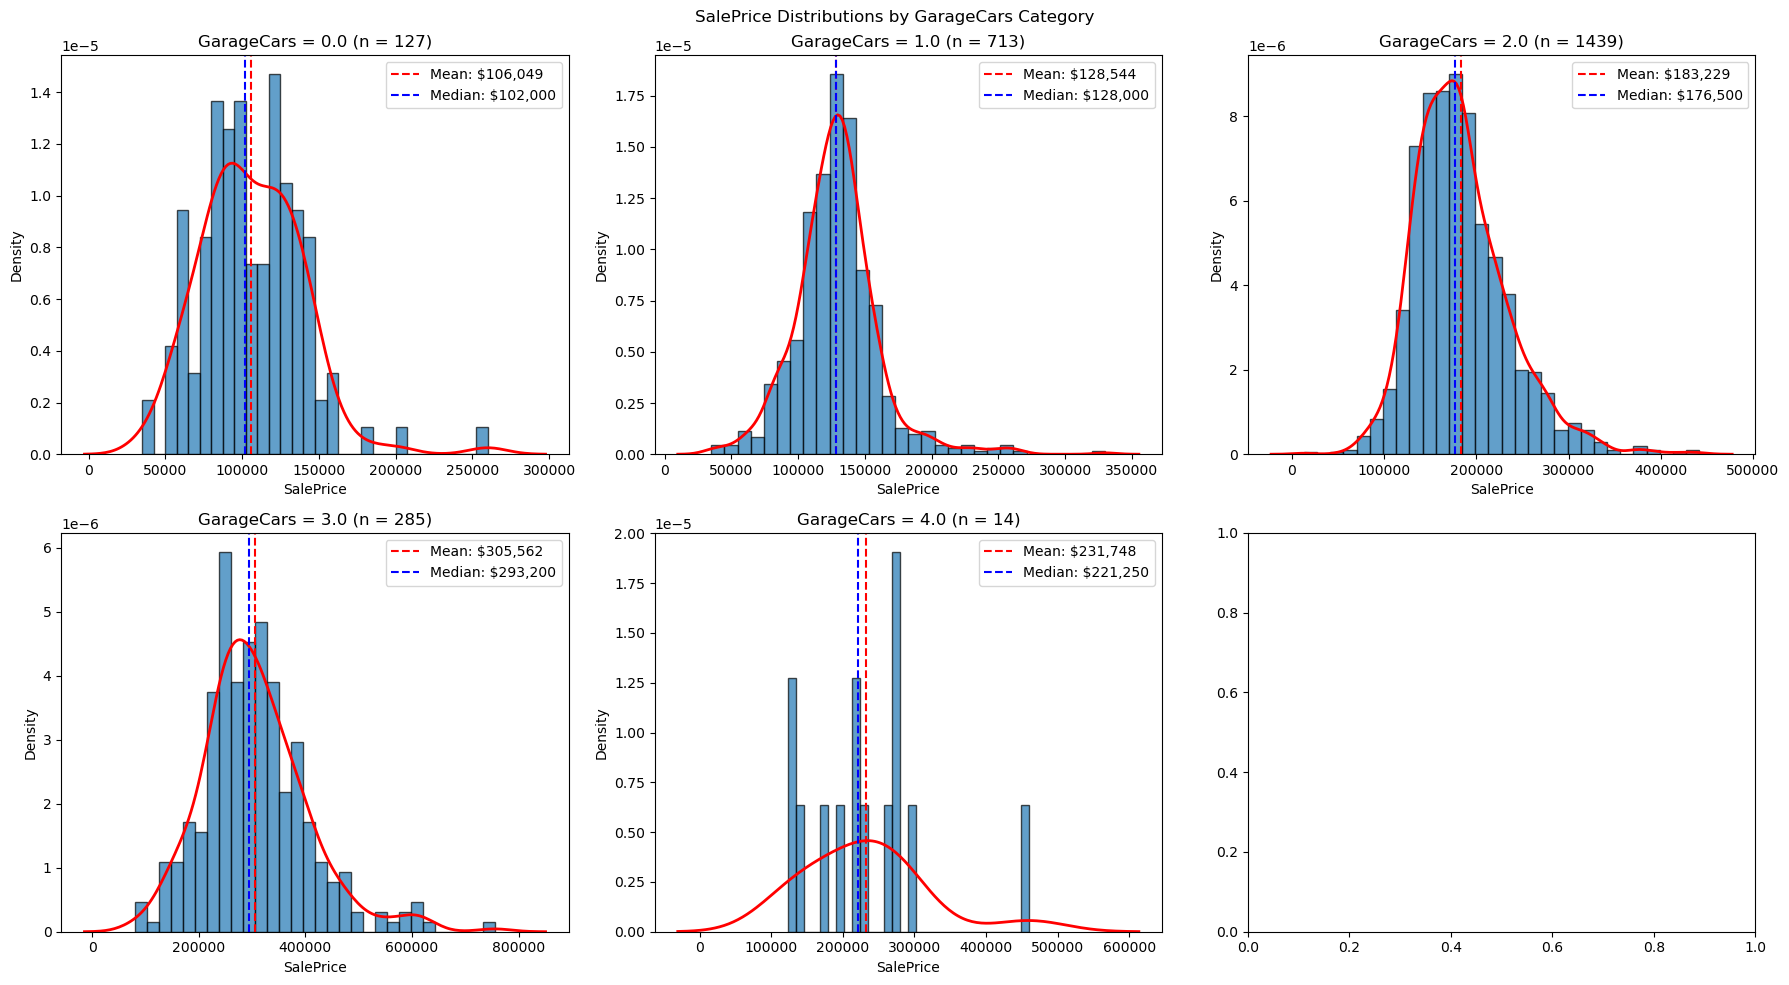

In [244]:
# Individual histograms with KDE curves (excluding houses with 1.75 and 5 car garages)
garage_categories = [0.0, 1.0, 2.0, 3.0, 4.0]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, garage_cars in enumerate(garage_categories):
    category_data = ames[ames['GarageCars'] == garage_cars]['SalePrice']
    
    # Histogram + KDE
    axes[i].hist(category_data, bins=30, alpha=0.7, density=True, edgecolor='black')
    sns.kdeplot(category_data, ax=axes[i], color='red', linewidth=2)
    
    # Add mean and median lines
    axes[i].axvline(category_data.mean(), color='red', linestyle='--', 
                   label=f'Mean: ${category_data.mean():,.0f}')
    axes[i].axvline(category_data.median(), color='blue', linestyle='--', 
                   label=f'Median: ${category_data.median():,.0f}')
    
    axes[i].set_title(f'GarageCars = {garage_cars} (n = {len(category_data)})')
    axes[i].legend()

plt.suptitle('SalePrice Distributions by GarageCars Category')
plt.tight_layout()
plt.show()

# Multicollinearity

In [249]:
# Necessary libraries: 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [251]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [253]:
numeric_features.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [255]:
correl_data_with_target = ames[['SalePrice', 'GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]

In [257]:
# look at correlation values for numeric features, without SalePrice (target) and PID
correl_data = ames[['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]
correl_data

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,856,30,NaN,7890,6,6,1939,1950,0.0,238.0,...,399.0,0,0,0,0,166,0,0,3,2010
1,1049,120,42.0,4235,5,5,1984,1984,149.0,552.0,...,266.0,0,105,0,0,0,0,0,2,2009
2,1001,30,60.0,6060,5,9,1930,2007,0.0,737.0,...,216.0,154,0,42,86,0,0,0,11,2007
3,1039,70,80.0,8146,4,8,1900,2003,0.0,0.0,...,281.0,0,0,168,0,111,0,0,5,2009
4,1665,60,70.0,8400,8,6,2001,2001,0.0,643.0,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,NaN,8854,6,6,1916,1950,0.0,0.0,...,192.0,0,98,0,0,40,0,0,5,2009
2576,1733,20,NaN,13680,3,5,1955,1955,0.0,0.0,...,452.0,0,0,0,0,0,0,0,6,2009
2577,2002,90,82.0,6270,5,6,1949,1950,0.0,284.0,...,871.0,0,0,0,0,0,0,0,8,2007
2578,1842,60,NaN,8826,7,5,2000,2000,144.0,841.0,...,486.0,193,96,0,0,0,0,0,7,2007


In [259]:
corr_matrix = correl_data.corr()
corr_matrix

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
GrLivArea,1.000000,0.070785,0.345448,0.260322,0.559897,-0.105670,0.228400,0.306035,0.387206,0.164899,...,0.477152,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
MSSubClass,0.070785,1.000000,-0.438724,-0.198040,0.056468,-0.075542,0.053852,0.056756,0.017831,-0.074092,...,-0.091177,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
LotFrontage,0.345448,-0.438724,1.000000,0.463720,0.179656,-0.054048,0.099602,0.063548,0.202139,0.177304,...,0.337158,0.123743,0.142809,0.003480,0.034406,0.083849,0.086041,0.017859,0.002164,-0.002555
LotArea,0.260322,-0.198040,0.463720,1.000000,0.080607,-0.032693,0.012397,0.010293,0.103416,0.163468,...,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,0.559897,0.056468,0.179656,0.080607,1.000000,-0.095927,0.574400,0.546297,0.405763,0.273919,...,0.538183,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,-0.105670,-0.075542,-0.054048,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.143986,-0.064347,...,-0.168238,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,0.228400,0.053852,0.099602,0.012397,0.574400,-0.397274,1.000000,0.572276,0.307228,0.303616,...,0.463175,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349
YearRemodAdd,0.306035,0.056756,0.063548,0.010293,0.546297,0.065100,0.572276,1.000000,0.175371,0.156527,...,0.348446,0.218273,0.226677,-0.205205,0.028543,-0.043130,-0.018693,-0.016669,0.002476,0.064046
MasVnrArea,0.387206,0.017831,0.202139,0.103416,0.405763,-0.143986,0.307228,0.175371,1.000000,0.277336,...,0.348993,0.149177,0.120976,-0.103015,0.011669,0.064176,-0.003808,-0.021950,-0.006574,-0.019894
BsmtFinSF1,0.164899,-0.074092,0.177304,0.163468,0.273919,-0.064347,0.303616,0.156527,0.277336,1.000000,...,0.298309,0.217422,0.100385,-0.107396,0.044348,0.102109,0.017784,0.014571,-0.003877,0.014207


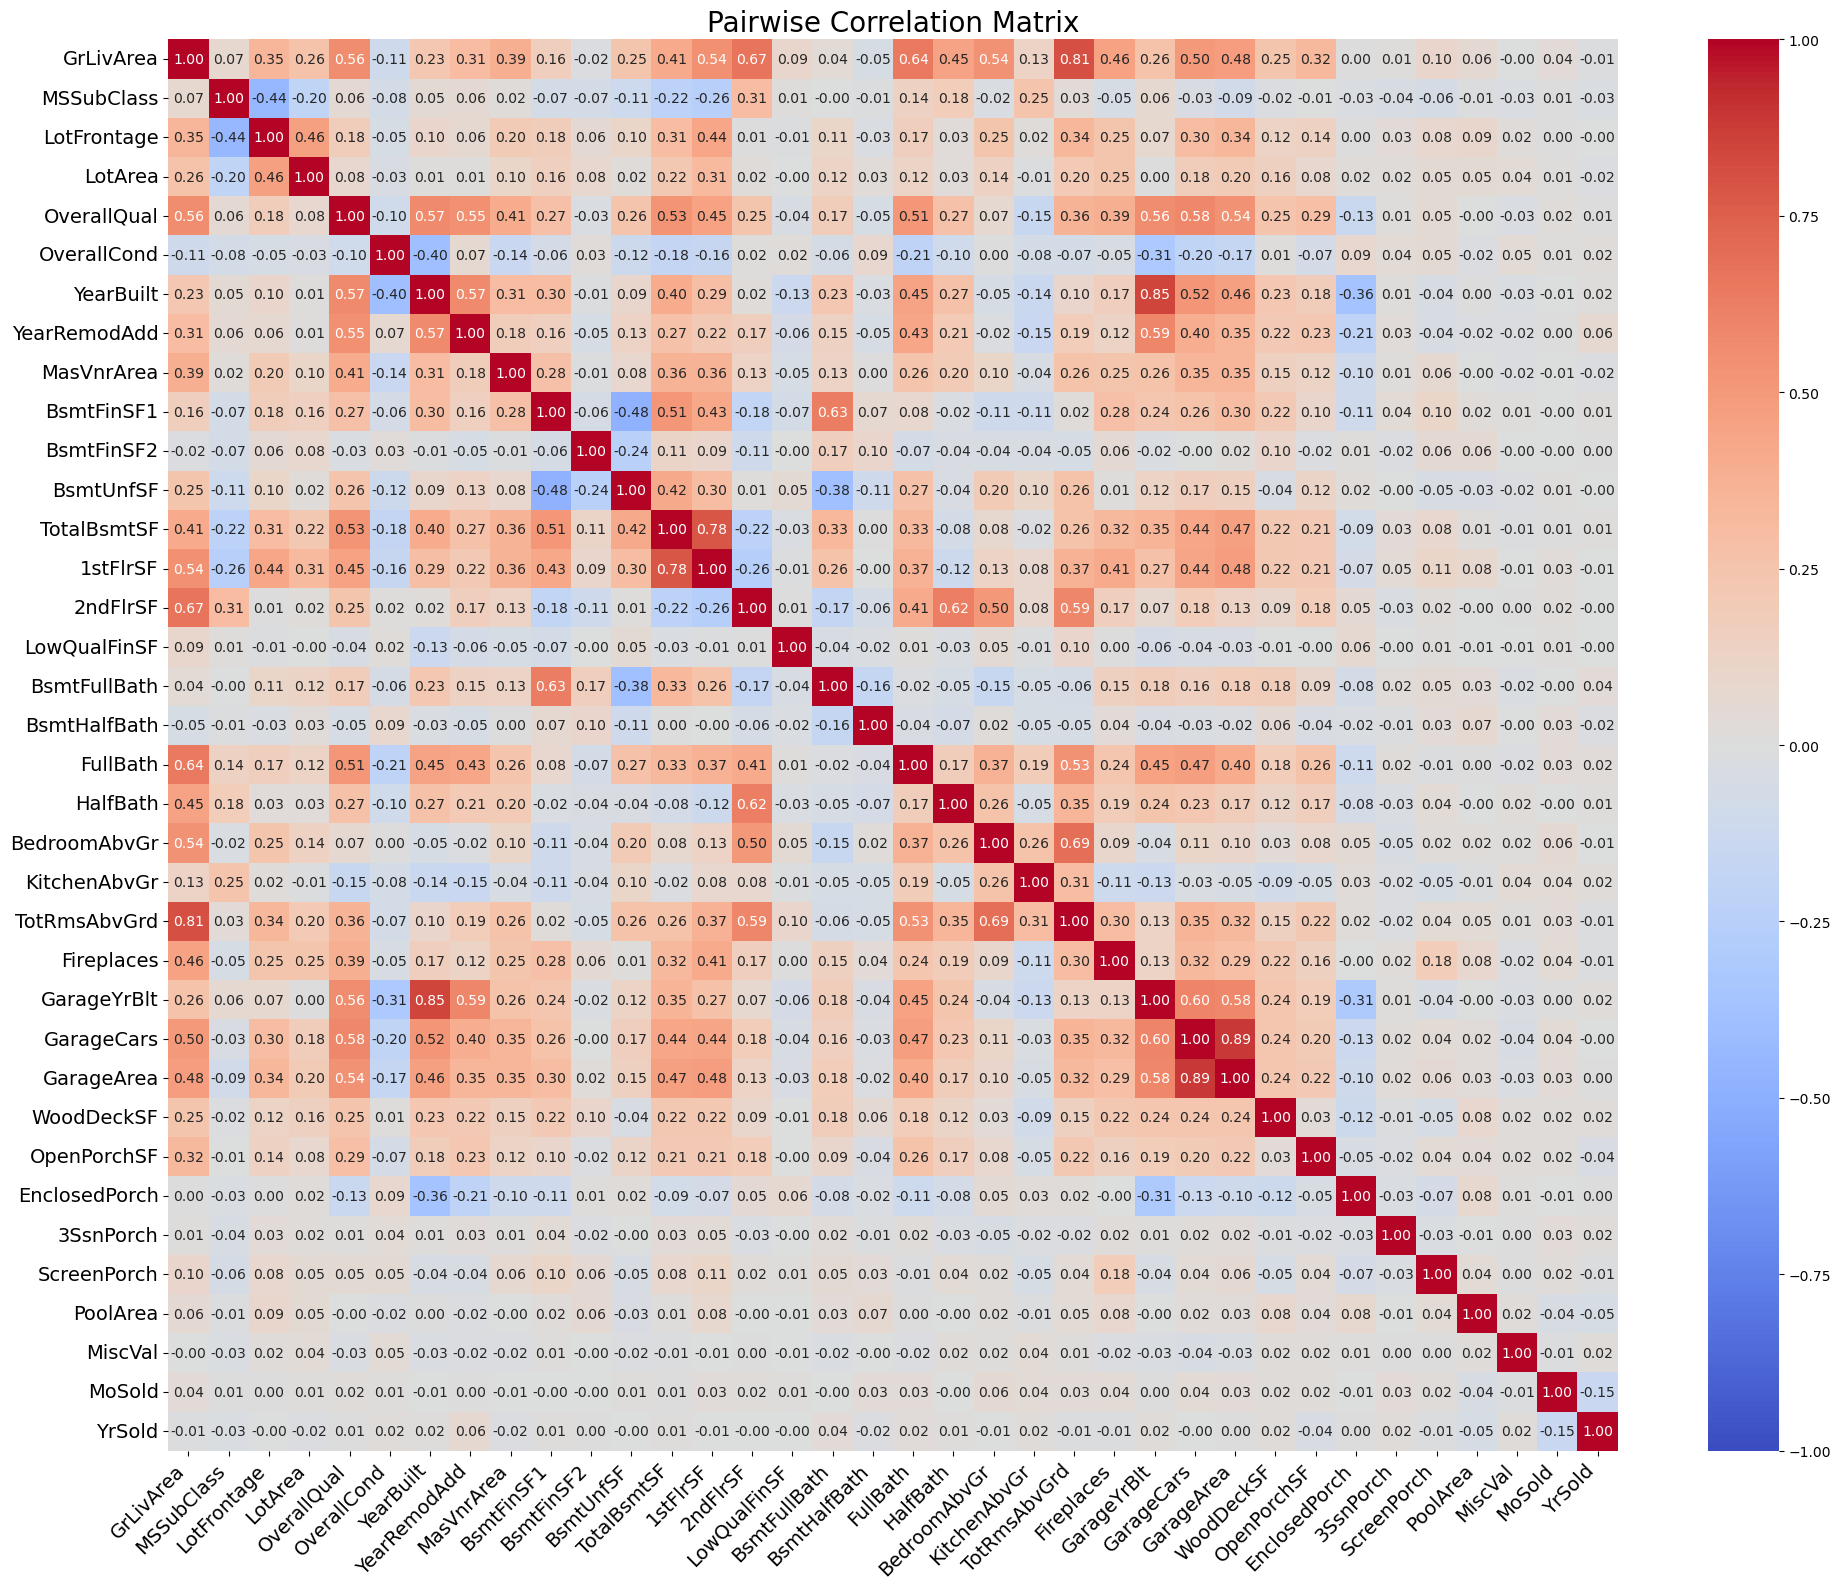

In [261]:
# visualize the correlations

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={'size': 10}, 
            fmt='.2f',  # Show only 2 decimal places
            xticklabels=True, yticklabels=True)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.title('Pairwise Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

# Resources
[Return To Top](#Contents)

**Dean De Cock paper and original data:**

https://jse.amstat.org/v19n3/decock.pdf

https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

[Ames Data Dictionary](https://github.com/Padre-Media/dataset/blob/main/Ames%20Data%20Dictionary.txt)

[Exploring Dictionaries, Classifying Variables, and Imputing Data in the Ames Dataset](https://machinelearningmastery.com/classifying_variables/)

[Revealing the Invisible: Visualizing Missing Values in Ames Housing](https://machinelearningmastery.com/revealing_the_invisible/)

[Log Models, Ken Benoit](https://kenbenoit.net/assets/courses/me104/logmodels2.pdf)

Multicollinearity and VIF
- https://www.datacamp.com/tutorial/multicollinearity